### Why NBA DFS?

The task of wrangling and analyzing NBA data to aim at predicting daily fantasy sports is very close to my heart because it led me on a journey that opened my eyes to the extraordinary world of data science. <br>

I was using Google Sheets as my main tool to analyze and construct DFS lineups when I first became interested in this hobby, but I soon realize after the first year that the highest-ranked DFS players were using much more sophisticated tools like R and Python. Further research led me to signing up for DataCamp and then I eventually decided to switch my entire career to Data Science and joining SpringBoard's program as I become convinced that Data Science is like a superpower. It can provide meaningful insights in countless industries, it can predict the future, and after listening to a data science podcast where one data scientist discussed how his team literally save lives using data science to predict and help patients with sepsis in emergency rooms. <br> 

Thus, when I was considering a few different ideas for my Springboard's capstone project, I ended up choosing to look at predicting NBA DFS because I can both hone my superpowers while analyzing the subject that I'm very interested in and have some domain expertise in. <br>

I hope that the analysis and conclusions can provide some meaningful insights to the readers since I know the NBA league itself is the fastest growing sport and with on-demand services like Netflix being more popular, sports is becoming more and more attractice due to more lucrative TV contracts, and the DFS industry itself is just in its infancy with plenty of room for growth. Therefore, I hope that this phenomenon will lead to more and more daily fantasy players who might find this capstone useful. 


### The Goal

The main goal of this capstone project is to look at two sets of NBA data and to come up with a model that will be useful in differentiating the stats that matter the most in predicting
and projecting daily fantasy points for each player. 

My main hypothesis from playing DFS for 2 years is that performing clustering analysis to engineer a feature called DvC, defense vs clustering, will be very valuable in predicting future fantasy points performance for each player. 

### The Data


For my capstone project, I utilized two main sets of data and employed various data wrangling techniques to prepare them for analysis and for performing computations that will yield meaningful insights that will compose a model that can predict a player daily fantasy points. 


First Dataset = Seasonal Player Data from stats.nba.com

# Part 1 Clustering All Active NBA Players

In [140]:
# Import Packages
import numpy as np
import pandas as pd

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [141]:
# Player Data from NBA.com
nbastatsfile = "/Users/kaizen/Data Science/Capstone/After Data Update/NBADFSCapstoneData2018.csv"
data = pd.read_csv(nbastatsfile)
# Stats range from 10/17/17 to 12/26/17 
data = data.drop(['Unnamed: 0'], axis=1)
# Replacing #ERROR! column after TD3 column to PLUSMINUS column  
data = data.rename(columns=lambda x: x.replace('#ERROR!', "PLUSMINUS"))
# Replacing 0.625 column to 3PM for 3 point made 0.625
data = data.rename(columns=lambda x: x.replace('3:00 PM', "3PM"))
# Replacing '2nd PTS' column due to space to '2ndPTS' for assist ratio
data = data.rename(columns=lambda x: x.replace('2nd PTS', '2ndPTS'))
# # Replacing 'PTS OFF TO' column due to space to ''PTSOFFTO' for turnover ratio
# data = data.rename(columns=lambda x: x.replace('PTS OFF TO', 'PTSOFFTO'))
# Replacing '%PTS2PT MR' column due to space to '%PTS2PTMR' for % of 2pts from midrange 
data = data.rename(columns=lambda x: x.replace('%PTS2PT MR', '%PTS2PTMR'))
data.columns
data.head(10)

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,PLUSMINUS,PTS OFF TO,2ndPTS,FBPs,PITP,OppPTSOFFTO,Opp2ndPTS,OppFBPs,OppPITP,BLKA,PFD,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TO Ratio,eFG%,TS%,USG%,PACE,PIE,%FGA2PT,%FGA3PT,%PTS2PT,%PTS2PTMR,%PTS3PT,%PTSFBPs,%PTSFT,%PTSOffTO,%PTSPITP,2FGM%AST,2FGM%UAST,3FGM%AST,3FGM%UAST,FGM%AST,FGM%UAST
0,Giannis Antetokounmpo,MIL,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,5.1,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3
1,James Harden,HOU,28,32,25,7,36.3,32.4,9.7,21.3,45.6,4.3,10.8,39.4,8.8,10.2,86.5,0.5,4.7,5.2,9.2,4.4,1.8,0.5,2.7,55.0,13,2,8.0,5.0,1.8,2.1,9.5,13.7,8.6,9.9,35.1,1.3,7.1,115.9,105.8,10.2,45.2,2.09,23.3,1.6,14.7,8.2,11.1,55.6,63.0,36.0,101.71,19.3,49.3,50.7,33.5,4.2,39.3,6.5,27.2,15.3,29.3,12.6,87.4,30.1,69.9,20.3,79.7
2,LeBron James,CLE,33,34,24,10,37.4,28.1,10.7,18.9,56.5,2.1,5.1,40.6,4.6,5.9,77.7,1.2,7.0,8.1,9.1,4.4,1.4,1.1,1.7,54.8,22,6,3.1,4.4,2.4,3.5,14.2,12.5,9.6,8.9,35.9,0.8,5.0,114.2,110.5,3.7,43.8,2.10,26.1,3.8,20.9,12.6,12.4,62.0,65.2,31.1,98.34,19.9,72.8,27.2,61.3,10.7,22.3,12.4,16.4,15.7,50.6,29.7,70.3,33.8,66.2,30.5,69.5
3,Russell Westbrook,OKC,29,34,19,15,36.3,23.9,8.6,20.6,41.6,1.6,5.0,31.6,5.1,7.1,71.8,1.7,7.6,9.4,9.9,4.5,2.1,0.2,2.6,52.3,22,11,4.7,5.3,2.4,4.9,9.5,11.9,8.4,6.9,30.8,1.1,5.7,106.7,101.0,5.6,46.6,2.22,26.0,5.2,24.6,14.5,11.7,45.4,50.2,33.4,98.63,18.2,75.6,24.4,58.7,18.7,20.0,20.6,21.3,22.1,40.0,15.1,84.9,37.0,63.0,19.2,80.8
4,DeMarcus Cousins,NOP,27,33,17,16,35.2,25.9,8.9,18.6,47.8,2.2,6.2,35.3,6.0,8.1,73.8,2.1,10.0,12.1,5.2,5.1,1.5,1.5,3.7,52.0,24,1,0.0,3.3,3.3,1.6,12.1,13.6,9.3,10.6,33.2,1.4,7.6,107.9,107.9,0.0,24.7,1.02,16.0,7.0,31.7,19.7,15.7,53.7,58.5,34.0,100.81,16.7,66.7,33.3,51.7,5.1,25.3,6.1,23.0,12.9,46.5,40.3,59.7,93.1,6.9,53.2,46.8
5,Kevin Durant,GSW,29,29,23,6,34.8,26.2,9.5,19.0,49.9,2.4,6.5,37.8,4.8,5.5,88.1,0.6,6.6,7.2,5.1,3.4,0.8,2.3,2.3,48.6,6,1,7.6,3.8,1.8,3.9,8.6,13.7,10.0,11.0,33.0,0.9,5.0,114.2,103.0,11.2,22.9,1.51,17.1,2.2,18.9,11.4,11.4,56.4,61.3,30.8,102.44,16.5,65.9,34.1,53.6,21.0,28.0,15.0,18.4,14.6,32.6,50.5,49.5,76.1,23.9,57.1,42.9
6,Anthony Davis,NOP,24,28,14,14,35.1,25.1,9.2,16.1,56.9,0.6,1.7,35.4,6.2,7.7,80.1,2.4,8.0,10.4,2.4,2.1,1.1,2.0,1.9,48.3,18,0,3.4,4.3,4.4,3.1,13.9,13.0,10.0,10.0,31.2,0.4,7.1,108.3,103.3,5.0,11.4,1.15,10.1,8.1,23.7,16.4,8.8,58.7,64.3,26.9,102.05,18.9,89.4,10.6,68.3,12.8,7.3,12.5,24.5,16.9,55.5,66.3,33.8,94.1,5.9,68.1,31.9
7,Joel Embiid,PHI,23,25,14,11,31.2,23.8,8.2,16.9,48.6,0.8,2.7,27.9,6.6,8.2,80.9,2.3,8.8,11.1,3.4,4.1,0.6,2.0,3.5,45.9,15,0,5.1,2.6,3.4,0.4,11.0,10.8,8.8,5.4,24.4,1.2,7.3,106.6,99.2,7.4,20.1,0.83,12.3,8.3,27.6,18.6,14.7,50.8,58.0,33.8,101.21,18.5,83.9,16.1,62.6,16.5,9.6,1.9,27.8,10.9,46.1,47.3,52.7,94.7,5.3,51.7,48.3
8,Stephen Curry,GSW,29,23,18,5,32.6,26.3,8.3,17.7,47.3,3.6,9.5,38.1,6.0,6.5,93.3,0.7,4.4,5.1,6.6,2.9,1.7,0.2,2.5,45.1,4,0,11.5,3.8,1.9,4.7,5.8,12.7,9.2,11.2,32.0,0.3,4.0,118.9,102.3,16.6,28.1,2.25,21.9,2.4,13.7,8.6,9.7,57.5,64.3,29.8,107.31,16.2,46.3,53.7,36.0,13.9,41.1,17.7,22.9,14.4,22.1,41.3,58.7,61.4,38.6,50.0,50.0
9,Ben Simmons,PHI,21,32,14,18,36.3,16.8,7.1,13.9,51.1,0.0,0.3,0.0,2.6,4.8,52.9,2.0,6.8,8.8,7.6,3.9,1.9,0.8,2.7,43.2,18,4,0.8,3.3,1.6,1.8,13.4,14.5,9.7,7.6,30.6,0.7,4.6,104.2,102.6,1.7,32.9,1.93,27.5,6.3,19.2,13.1,14.3,51.1,52.3,23.2,103.20,14.3,98.0,2.0,84.8,4.8,0.0,10.8,15.2,19.7,79.9,31.6,68.4,0.0,0.0,31.6,68.4


In [142]:
data.shape

(474, 69)

##### Visual EDA

To visually explore this dataset and to confirm normal expectations of the trends, I initially plotted a few variables that are generally regarded as important predictors of FP in the basketball analytics community

In [143]:
# Import necessary packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})

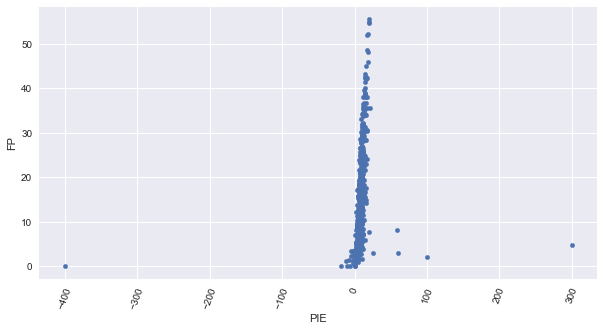

In [144]:
data.plot(kind='scatter', x='PIE', y='FP', rot=70)
plt.show()

In [145]:
# Note the outlier PIE of 300
# This is due to players with limited data (like Jack Cooley in this instance with only 1 GP)
# Tidy data and remove all players with less than 5 games and play less than 5 minutes per game
data = data[data.GP > 5]
data.shape

(423, 69)

In [146]:
data = data[data.MIN > 5]
data.shape

(408, 69)

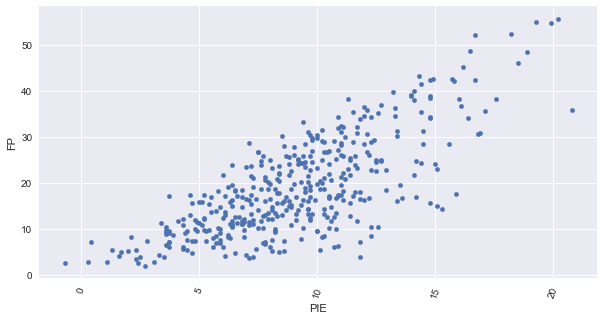

In [147]:
data.plot(kind='scatter', x='PIE', y='FP', rot=70)
plt.show()
# Here we see that there is a clear positive correlation between Fantasy Points and Player Impact Estimate
# Underrated vs overrated, counterintuitive points, try to tell a rich story

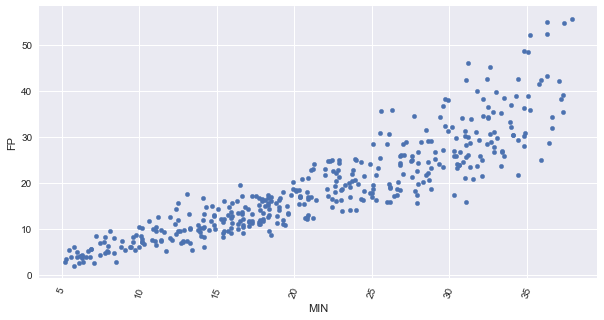

In [148]:
data.plot(kind='scatter', x='MIN', y='FP', rot=70)
plt.show()
# FP is also positively correlated with minutes played but with a steeper increase in rate after the 25 min mark

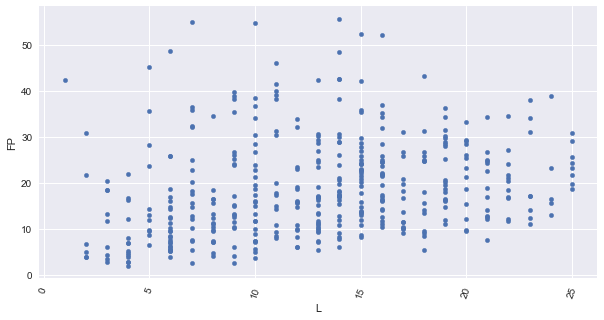

In [149]:
data.plot(kind='scatter', x='L', y='FP', rot=70)
plt.show()
# This graph shows that losing records has some but not clear correlation with FP 

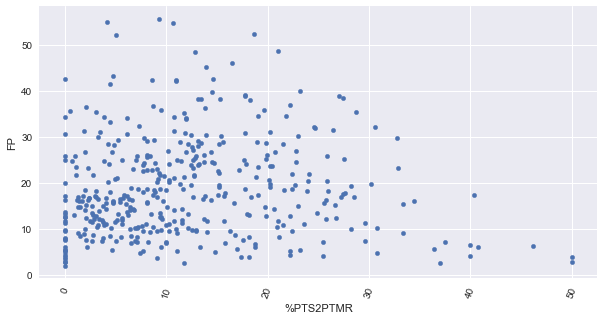

In [150]:
data.plot(kind='scatter', x='%PTS2PTMR', y='FP', rot=70)
plt.show()
# This insight confirms the new basketball analytics community's notions that the midrange shot is no longer efficient 
# in predicting basketball outcomes and player's fantasy production 
# in the modern NBA era where games are won at the 3-point line and with PITP 
# (outliers/exceptions do exists such as Demar Derozan)

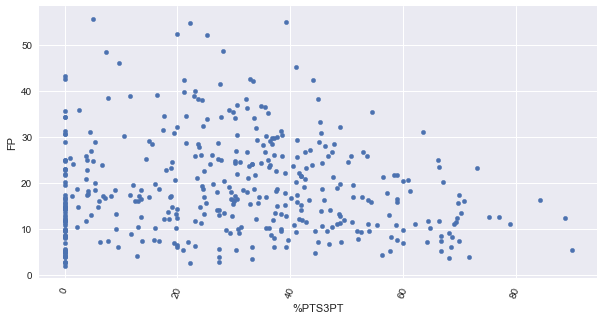

In [151]:
data.plot(kind='scatter', x='%PTS3PT', y='FP', rot=70)
plt.show()
# This graph hints that the highest FP players have an optimum percentage of points made from 3 number 

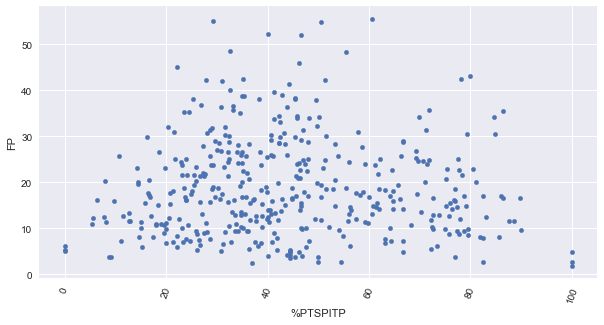

In [152]:
data.plot(kind='scatter', x='%PTSPITP', y='FP', rot=70)
plt.show()
# This graph illustrates a similar point above that there is an optimal % of points in the paint for high FP output 

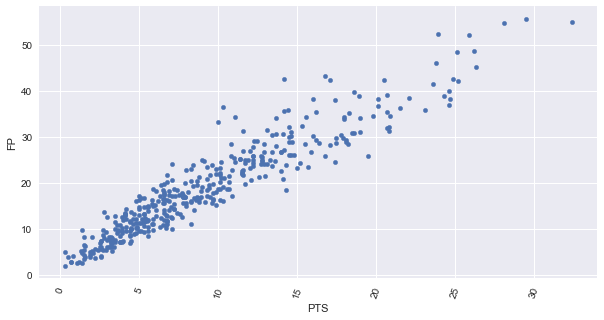

In [153]:
data.plot(kind='scatter', x='PTS', y='FP', rot=70)
plt.show()
# As we see here below actual basket scored points, PTS, has a direct and high positive correlation with fantasy points
# However, while points are important, the consensus among pros and the basketball analytics commounity is that 
# peripheral points or points that are not basket scored such as steals, blocks, and rebounds are more predictive 
# and gives an NBA DFS player more of an edge over the field, one main reason is due to  
# the high varying nature day to day of peripheral points vs different teams based on position/cluster weaknesses 
# and since regular points are more stable the model used by DK/FD usually can account for that quicker and reflect 
# this in the daily posting of player salaries (important later for Rotoguru's data analysis)

###### I have also added another column/feature called Peripheral Points after my extensive research that indicate this stat will be predictive for FP


In [154]:
data['PERIPHERAL'] = data.FP - data.PTS
data.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,PLUSMINUS,PTS OFF TO,2ndPTS,FBPs,PITP,OppPTSOFFTO,Opp2ndPTS,OppFBPs,OppPITP,BLKA,PFD,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TO Ratio,eFG%,TS%,USG%,PACE,PIE,%FGA2PT,%FGA3PT,%PTS2PT,%PTS2PTMR,%PTS3PT,%PTSFBPs,%PTSFT,%PTSOffTO,%PTSPITP,2FGM%AST,2FGM%UAST,3FGM%AST,3FGM%UAST,FGM%AST,FGM%UAST,PERIPHERAL
0,Giannis Antetokounmpo,MIL,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,5.1,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1
1,James Harden,HOU,28,32,25,7,36.3,32.4,9.7,21.3,45.6,4.3,10.8,39.4,8.8,10.2,86.5,0.5,4.7,5.2,9.2,4.4,1.8,0.5,2.7,55.0,13,2,8.0,5.0,1.8,2.1,9.5,13.7,8.6,9.9,35.1,1.3,7.1,115.9,105.8,10.2,45.2,2.09,23.3,1.6,14.7,8.2,11.1,55.6,63.0,36.0,101.71,19.3,49.3,50.7,33.5,4.2,39.3,6.5,27.2,15.3,29.3,12.6,87.4,30.1,69.9,20.3,79.7,22.6
2,LeBron James,CLE,33,34,24,10,37.4,28.1,10.7,18.9,56.5,2.1,5.1,40.6,4.6,5.9,77.7,1.2,7.0,8.1,9.1,4.4,1.4,1.1,1.7,54.8,22,6,3.1,4.4,2.4,3.5,14.2,12.5,9.6,8.9,35.9,0.8,5.0,114.2,110.5,3.7,43.8,2.10,26.1,3.8,20.9,12.6,12.4,62.0,65.2,31.1,98.34,19.9,72.8,27.2,61.3,10.7,22.3,12.4,16.4,15.7,50.6,29.7,70.3,33.8,66.2,30.5,69.5,26.7
3,Russell Westbrook,OKC,29,34,19,15,36.3,23.9,8.6,20.6,41.6,1.6,5.0,31.6,5.1,7.1,71.8,1.7,7.6,9.4,9.9,4.5,2.1,0.2,2.6,52.3,22,11,4.7,5.3,2.4,4.9,9.5,11.9,8.4,6.9,30.8,1.1,5.7,106.7,101.0,5.6,46.6,2.22,26.0,5.2,24.6,14.5,11.7,45.4,50.2,33.4,98.63,18.2,75.6,24.4,58.7,18.7,20.0,20.6,21.3,22.1,40.0,15.1,84.9,37.0,63.0,19.2,80.8,28.4
4,DeMarcus Cousins,NOP,27,33,17,16,35.2,25.9,8.9,18.6,47.8,2.2,6.2,35.3,6.0,8.1,73.8,2.1,10.0,12.1,5.2,5.1,1.5,1.5,3.7,52.0,24,1,0.0,3.3,3.3,1.6,12.1,13.6,9.3,10.6,33.2,1.4,7.6,107.9,107.9,0.0,24.7,1.02,16.0,7.0,31.7,19.7,15.7,53.7,58.5,34.0,100.81,16.7,66.7,33.3,51.7,5.1,25.3,6.1,23.0,12.9,46.5,40.3,59.7,93.1,6.9,53.2,46.8,26.1


##### My next step is to performing clustering analysis for each player using all of the stats in the player dataset's columns above

Please see more detailed code and explanations in my NBA DFS Capstone Part 1 Clustering Notebook

In [155]:
# Clustering Analysis Computation Compacted (Please see expanded version in Part 1 Notebook)

# Import conventional NBA positions AGAIN with updated positions to fill missing values  
# to be used as the target variable y
posdatafile2 = '/Users/kaizen/Data Science/Capstone/NBA_DFS_Positions_2.csv'
pos2 = pd.read_csv(posdatafile2)

# Perform merge of position dataframes to original dataset
data= pd.merge(pos2, data, on=['PLAYER', 'TEAM'], how='right')
data = data.sort_values(['FP'], ascending=False)

# Import necessary packages
import re
import glob
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.preprocessing import scale

# Prepare X features/predictor variables and Y target variable
X = data.drop(['PLAYER', 'TEAM', 'POS'], axis=1)
y = data.POS

# Scale Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensional Reduction with PCA, LDA, RDA, QDA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("PCA Cumulative Explained Variance:", pca.explained_variance_ratio_.sum())
LDA = LinearDiscriminantAnalysis(n_components=2, shrinkage='auto', solver='eigen')
LDA_reduced_df = LDA.fit(X_scaled,y).transform(X_scaled)
print('LDA Score: ', LDA.score(X_scaled,y))

# KMeans Clustering Functions
from sklearn import cluster, metrics, datasets
np.set_printoptions(precision=4)


def kmeans(reduced_data, n_clusters):
    """
    performs kmeans clustering and returns labels, centroids, inertia, and silhouette score
    """
    kmeans = cluster.KMeans(n_clusters=n_clusters, random_state=42)
    kmeans = kmeans.fit(reduced_data)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia = kmeans.inertia_
    sil_score = metrics.silhouette_score(reduced_data, kmeans.labels_, metric='euclidean')

    data_dictionary = {
        "labels": labels,
        "centroids": centroids,
        "inertia" : inertia,
        "silhouette_score": sil_score
    }

    return data_dictionary


def find_best_cluster(data,a,b):
    """
    plots and finds the best silhouette score for range(a,b)
    """
    scores = []
    for i in range(a,b):
        i_clusters = kmeans(data, i)
        sil_score_i = i_clusters['silhouette_score']
        scores.append(sil_score_i)

    sns.set_context('poster', font_scale=1)
    plt.plot(range(a,b), scores)
    plt.title("""Measuring Silhouette Score to Find Best Cluster""")
    print("best silhouette score:", np.max(scores))



def feature_importance(cluster_data, league_data):
    """
    takes reduced data,
    performs Principal Component Analysis,
    returns feature importance dataframe
    """
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(cluster_data)

    pca = PCA(n_components=2)
    PCA_reduced_df = pca.fit(scaled_data).transform(scaled_data)

    features = pd.DataFrame(zip(cluster_data.columns, pca.components_[0], np.mean(cluster_data), np.mean(league_data)),
        columns=['Feature', 'Importance', 'Cluster Average', 'League Average']).sort_values('Importance', ascending=False).head(10)

    return features


def plot_kmeans_cluster(reduced_data, k_clusters, plot_title):
    kmeans = KMeans(init='k-means++', n_clusters=k_clusters, n_init=10)
    kmeans.fit(reduced_data)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(15,10))
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=10)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
    plt.title(plot_title)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

PCA Cumulative Explained Variance: 0.4852144590166485
LDA Score:  0.7377450980392157


best silhouette score: 0.3983538157093168


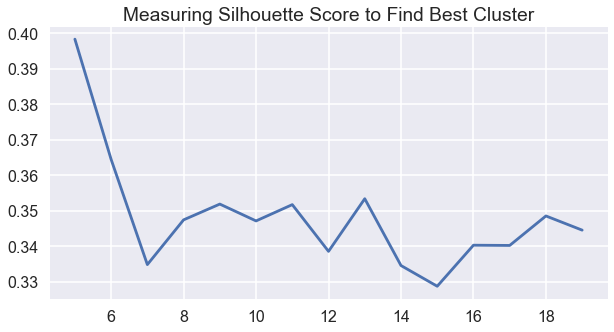

In [156]:
# Plot and choose best cluster number using the knee/elbow method
find_best_cluster(LDA_reduced_df,5,20)

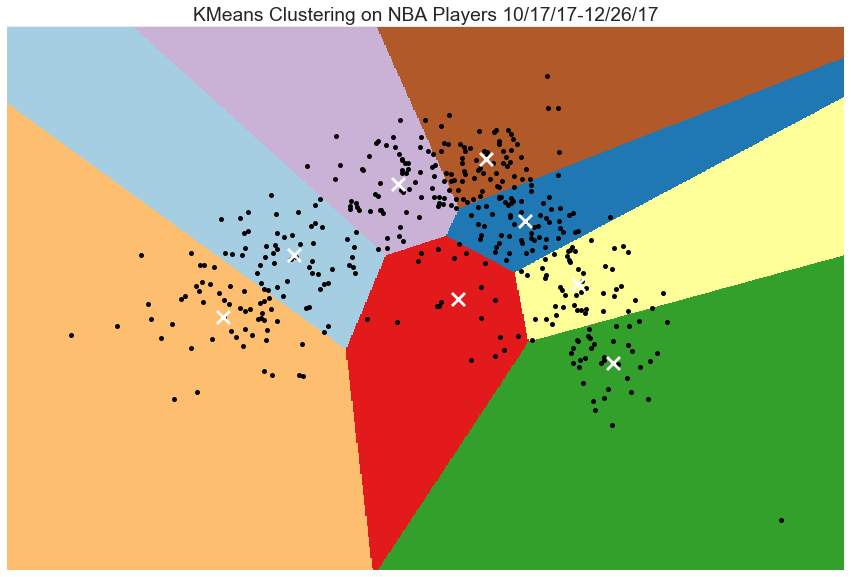

In [157]:
# Visualize Scatter Plot

# Assign labels
kmeans = kmeans(LDA_reduced_df, 8)
data['Cluster'] = kmeans['labels']

# Target labels
y = kmeans['labels']
df = pd.DataFrame({'X1':LDA_reduced_df[:,0],'X2':LDA_reduced_df[:,1], 'labels':y})

# # Graph with Seaborn
# sns.set_context("poster", font_scale=1)
# graph = sns.lmplot('X1', 'X2', data=df, fit_reg=False, hue="labels", size=10, palette="deep", markers='s')

plot_kmeans_cluster(LDA_reduced_df, k_clusters=8, plot_title="""KMeans Clustering on NBA Players 10/17/17-12/26/17""")

#### Clustering Analysis

As we can see from the visualization above, all of the active players in the NBA can be segmented into 8 different clusters. 

We now continue our research further and aim to find out if these clusters correspond similarly to the 5 conventional NBA positions of PG, SG, SF, PF, and C or if they differ in interesting ways and if this will confirm or repudiate our hypothesis that clusters are more predictive than the conventional and highly-utilized DvP or defense vs positions stats.  

In [158]:
# We first investigate our clustering results 
cluster_avg_stats = data.describe().transpose()
cluster_avg_stats

,count,mean,std,min,25%,50%,75%,max
AGE,408.0,26.458333,4.352776,19.00,23.0000,26.000,29.0000,40.0
GP,408.0,25.757353,8.394303,6.00,20.0000,29.000,32.0000,37.0
W,408.0,12.818627,6.397285,0.00,8.0000,12.000,18.0000,27.0
L,408.0,12.938725,5.713355,1.00,8.0000,13.000,17.0000,25.0
MIN,408.0,21.512990,8.601860,5.20,14.8000,21.000,28.8000,37.9
PTS,408.0,9.240441,6.021314,0.30,4.7750,7.800,12.7000,32.4
FGM,408.0,3.427206,2.166298,0.10,1.8000,2.900,4.8000,10.8
FGA,408.0,7.504167,4.578731,0.40,4.0000,6.400,10.3000,21.3
FG%,408.0,45.440196,8.155983,20.00,40.5750,44.700,50.0000,83.3
3PM,408.0,0.910049,0.829714,0.00,0.2000,0.700,1.4000,4.3


In [159]:
# Cluster Designations for all active NBA player for 2018
data

,PLAYER,POS,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,PLUSMINUS,PTS OFF TO,2ndPTS,FBPs,PITP,OppPTSOFFTO,Opp2ndPTS,OppFBPs,OppPITP,BLKA,PFD,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TO Ratio,eFG%,TS%,USG%,PACE,PIE,%FGA2PT,%FGA3PT,%PTS2PT,%PTS2PTMR,%PTS3PT,%PTSFBPs,%PTSFT,%PTSOffTO,%PTSPITP,2FGM%AST,2FGM%UAST,3FGM%AST,3FGM%UAST,FGM%AST,FGM%UAST,PERIPHERAL,Cluster
161,Giannis Antetokounmpo,PF,MIL,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,5.1,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1,1
390,James Harden,SG,HOU,28,32,25,7,36.3,32.4,9.7,21.3,45.6,4.3,10.8,39.4,8.8,10.2,86.5,0.5,4.7,5.2,9.2,4.4,1.8,0.5,2.7,55.0,13,2,8.0,5.0,1.8,2.1,9.5,13.7,8.6,9.9,35.1,1.3,7.1,115.9,105.8,10.2,45.2,2.09,23.3,1.6,14.7,8.2,11.1,55.6,63.0,36.0,101.71,19.3,49.3,50.7,33.5,4.2,39.3,6.5,27.2,15.3,29.3,12.6,87.4,30.1,69.9,20.3,79.7,22.6,4
160,LeBron James,PF,CLE,33,34,24,10,37.4,28.1,10.7,18.9,56.5,2.1,5.1,40.6,4.6,5.9,77.7,1.2,7.0,8.1,9.1,4.4,1.4,1.1,1.7,54.8,22,6,3.1,4.4,2.4,3.5,14.2,12.5,9.6,8.9,35.9,0.8,5.0,114.2,110.5,3.7,43.8,2.10,26.1,3.8,20.9,12.6,12.4,62.0,65.2,31.1,98.34,19.9,72.8,27.2,61.3,10.7,22.3,12.4,16.4,15.7,50.6,29.7,70.3,33.8,66.2,30.5,69.5,26.7,1
243,Russell Westbrook,PG,OKC,29,34,19,15,36.3,23.9,8.6,20.6,41.6,1.6,5.0,31.6,5.1,7.1,71.8,1.7,7.6,9.4,9.9,4.5,2.1,0.2,2.6,52.3,22,11,4.7,5.3,2.4,4.9,9.5,11.9,8.4,6.9,30.8,1.1,5.7,106.7,101.0,5.6,46.6,2.22,26.0,5.2,24.6,14.5,11.7,45.4,50.2,33.4,98.63,18.2,75.6,24.4,58.7,18.7,20.0,20.6,21.3,22.1,40.0,15.1,84.9,37.0,63.0,19.2,80.8,28.4,4
82,DeMarcus Cousins,C,NOP,27,33,17,16,35.2,25.9,8.9,18.6,47.8,2.2,6.2,35.3,6.0,8.1,73.8,2.1,10.0,12.1,5.2,5.1,1.5,1.5,3.7,52.0,24,1,0.0,3.3,3.3,1.6,12.1,13.6,9.3,10.6,33.2,1.4,7.6,107.9,107.9,0.0,24.7,1.02,16.0,7.0,31.7,19.7,15.7,53.7,58.5,34.0,100.81,16.7,66.7,33.3,51.7,5.1,25.3,6.1,23.0,12.9,46.5,40.3,59.7,93.1,6.9,53.2,46.8,26.1,3
156,Kevin Durant,PF,GSW,29,29,23,6,34.8,26.2,9.5,19.0,49.9,2.4,6.5,37.8,4.8,5.5,88.1,0.6,6.6,7.2,5.1,3.4,0.8,2.3,2.3,48.6,6,1,7.6,3.8,1.8,3.9,8.6,13.7,10.0,11.0,33.0,0.9,5.0,114.2,103.0,11.2,22.9,1.51,17.1,2.2,18.9,11.4,11.4,56.4,61.3,30.8,102.44,16.5,65.9,34.1,53.6,21.0,28.0,15.0,18.4,14.6,32.6,50.5,49.5,76.1,23.9,57.1,42.9,22.4,1
158,Anthony Davis,PF,NOP,24,28,14,14,35.1,25.1,9.2,16.1,56.9,0.6,1.7,35.4,6.2,7.7,80.1,2.4,8.0,10.4,2.4,2.1,1.1,2.0,1.9,48.3,18,0,3.4,4.3,4.4,3.1,13.9,13.0,10.0,10.0,31.2,0.4,7.1,108.3,103.3,5.0,11.4,1.15,10.1,8.1,23.7,16.4,8.8,58.7,64.3,26.9,102.05,18.9,89.4,10.6,68.3,12.8,7.3,12.5,24.5,16.9,55.5,66.3,33.8,94.1,5.9,68.1,31.9,23.2,6
75,Joel Embiid,C,PHI,23,25,14,11,31.2,23.8,8.2,16.9,48.6,0.8,2.7,27.9,6.6,8.2,80.9,2.3,8.8,11.1,3.4,4.1,0.6,2.0,3.5,45.9,15,0,5.1,2.6,3.4,0.4,11.0,10.8,8.8,5.4,24.4,1.2,7.3,106.6,99.2,7.4,20.1,0.83,12.3,8.3,27.6,18.6,14.7,50.8,58.0,33.8,101.21,18.5,83.9,16.1,62.6,16.5,9.6,1.9,27.8,10.9,46.1,47.3,52.7,94.7,5.3,51.7,48.3,22.1,3
236,Stephen Curry,PG,GSW,29,23,18,5,32.6,26.3,8.3,17.7,47.3,3.6,9.5,38.1,6.0,6.5,93.3,0.7,4.4,5.1,6.6,2.9,1.7,0.2,2.5,45.1,4,0,11.5,3.8,1.9,4.7,5.8,12.7,9.2,11.2,32.0,0.3,4.0,118.9,102.3,16.6,28.1,2.25,21.9,2.4,13.7,8.6,9.7,57.5,64.3,29.8,107.31,16.2,46.3,53.7,36.0,13.9,41.1,17.7,22.9,14.4,22.1,41.3,58.7,61.4,38.6,50.0,50.0,18.8,2
242,Ben Simmons,PG,PHI,21,32,14,18,36.3,16.8,7.1,13.9,51.1,0.0,0.3,0.0,2.6,4.8,52.9,2.0,6.8,8.8,7.6,3.9,1.9,0.8,2.7,43.2,18,4,0.8,3.3,1.6,1.8,13.4,14.5,9.7,7.6,30.6,0.7,4.6,104.2,102.6,1.7,32.9,1.93,27.5,6.3,19.2,13.1,14.3,51.1,52.3,23.2,103.20,14.3,98.0,2.0,84.8,4.8,0.0,10.8,15.2,19.7,79.9,31.6,68.4,0.0,0.0,31.6,68.4,26.4,4


#### We see above that the cluster types are definitely not the same as the conventional 5 positions. For example, Kevin Durant and Anthony Davis are both designated conventionally as Power Forwards but they are in cluster type 1 and 6, respectively. This makes sense intuitively since Durant has a complete different role on an all-star packed team who won 2 recent championships with the warriors, whereas Davis plays a much different role with the inferior Pelicans.  

In [160]:
# Calculate count for each cluster type
data.Cluster.value_counts().sort_index()

0    73
1    22
2    64
3    59
4    35
5    61
6    50
7    44
Name: Cluster, dtype: int64

#### We now investigate each cluster closely to form cluster labels based on typical members 

In [161]:
# Cluster Groupings and Specific Stats
cluster_zero = data[data['Cluster'] == 0]
cluster_zero_stats = cluster_zero.describe().transpose()
cluster_one = data[data['Cluster'] == 1]
cluster_one_stats = cluster_one.describe().transpose()
cluster_two = data[data['Cluster'] == 2]
cluster_two_stats = cluster_two.describe().transpose()
cluster_three = data[data['Cluster'] == 3]
cluster_three_stats = cluster_three.describe().transpose()
cluster_four = data[data['Cluster'] == 4]
cluster_four_stats = cluster_four.describe().transpose()
cluster_five = data[data['Cluster'] == 5]
cluster_five_stats = cluster_five.describe().transpose()
cluster_six = data[data['Cluster'] == 6]
cluster_six_stats = cluster_six.describe().transpose()
cluster_seven = data[data['Cluster'] == 7]
cluster_seven_stats = cluster_seven.describe().transpose()

# Calculate the mean stats for each cluster for comparison and label construction for each player
cluster_seven_mean = cluster_seven_stats[['mean']]
cluster_seven_mean = cluster_seven_mean.rename(columns={'mean':'Cluster 7'})

cluster_six_mean = cluster_six_stats[['mean']]
cluster_six_mean = cluster_six_mean.rename(columns={'mean':'Cluster 6'})

cluster_five_mean = cluster_five_stats[['mean']]
cluster_five_mean = cluster_five_mean.rename(columns={'mean':'Cluster 5'})

cluster_four_mean = cluster_four_stats[['mean']]
cluster_four_mean = cluster_four_mean.rename(columns={'mean':'Cluster 4'})

cluster_three_mean = cluster_three_stats[['mean']]
cluster_three_mean = cluster_three_mean.rename(columns={'mean':'Cluster 3'})

cluster_two_mean = cluster_two_stats[['mean']]
cluster_two_mean = cluster_two_mean.rename(columns={'mean':'Cluster 2'})

cluster_one_mean = cluster_one_stats[['mean']]
cluster_one_mean = cluster_one_mean.rename(columns={'mean':'Cluster 1'})

cluster_zero_mean = cluster_zero_stats[['mean']]
cluster_zero_mean = cluster_zero_mean.rename(columns={'mean':'Cluster 0'})

cluster_avg_mean  = cluster_avg_stats[['mean']]
cluster_avg_mean = cluster_avg_mean.rename(columns={'mean':'AllClusterAVG'})

# Examine the average stats and label each cluster 
clusters = pd.concat([cluster_zero_mean, cluster_one_mean, cluster_two_mean, cluster_three_mean, cluster_four_mean, 
                    cluster_five_mean, cluster_six_mean, cluster_seven_mean, cluster_avg_mean], axis=1, 
                   join_axes=[cluster_zero_mean.index])
clusters

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,AllClusterAVG
AGE,26.191781,26.954545,26.109375,27.254237,26.828571,26.786885,26.0400,25.818182,26.458333
GP,27.876712,24.681818,25.578125,26.457627,23.685714,26.737705,23.3800,25.090909,25.757353
W,13.890411,14.000000,12.000000,14.152542,11.057143,13.606557,10.3200,13.000000,12.818627
L,13.986301,10.681818,13.578125,12.305085,12.628571,13.131148,13.0600,12.090909,12.938725
MIN,23.047945,22.486364,22.921875,19.230508,22.120000,21.624590,19.3560,21.304545,21.512990
PTS,9.053425,10.777273,10.367187,8.330508,10.234286,8.452459,8.8280,9.134091,9.240441
FGM,3.253425,3.981818,3.760938,3.286441,3.840000,3.111475,3.4640,3.209091,3.427206
FGA,7.643836,8.295455,8.640625,5.996610,8.771429,6.918033,6.9220,7.711364,7.504167
FG%,41.360274,46.077273,42.040625,55.984746,42.348571,44.536066,50.6340,40.506818,45.440196
3PM,1.393151,0.740909,1.159375,0.161017,0.871429,1.134426,0.4700,1.054545,0.910049


### Examine our data results and analyze each cluster based on their categorical statistics and typical members
(PLEASE NOTE: clusters and players change often throughout the season due to coaching changes, D-league demotion, injuries, etc. Also, the cluster itself might be a different number but the same label such as Elite Bigs or Ball Handler.) 

In [162]:
data.head(2)

,PLAYER,POS,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,PLUSMINUS,PTS OFF TO,2ndPTS,FBPs,PITP,OppPTSOFFTO,Opp2ndPTS,OppFBPs,OppPITP,BLKA,PFD,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TO Ratio,eFG%,TS%,USG%,PACE,PIE,%FGA2PT,%FGA3PT,%PTS2PT,%PTS2PTMR,%PTS3PT,%PTSFBPs,%PTSFT,%PTSOffTO,%PTSPITP,2FGM%AST,2FGM%UAST,3FGM%AST,3FGM%UAST,FGM%AST,FGM%UAST,PERIPHERAL,Cluster
161,Giannis Antetokounmpo,PF,MIL,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,5.1,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1,1
390,James Harden,SG,HOU,28,32,25,7,36.3,32.4,9.7,21.3,45.6,4.3,10.8,39.4,8.8,10.2,86.5,0.5,4.7,5.2,9.2,4.4,1.8,0.5,2.7,55.0,13,2,8.0,5.0,1.8,2.1,9.5,13.7,8.6,9.9,35.1,1.3,7.1,115.9,105.8,10.2,45.2,2.09,23.3,1.6,14.7,8.2,11.1,55.6,63.0,36.0,101.71,19.3,49.3,50.7,33.5,4.2,39.3,6.5,27.2,15.3,29.3,12.6,87.4,30.1,69.9,20.3,79.7,22.6,4


In [163]:
# Sort all players with cluster by team 
typ_mem = data[['PLAYER', 'TEAM', 'Cluster']]
typ_mem.sort_values('TEAM')

,PLAYER,TEAM,Cluster
403,Taurean Prince,ATL,0
180,Isaiah Taylor,ATL,7
195,Malcolm Delaney,ATL,2
365,Kent Bazemore,ATL,2
130,John Collins,ATL,3
265,Luke Babbitt,ATL,0
36,Miles Plumlee,ATL,6
354,Marco Belinelli,ATL,0
99,Tyler Cavanaugh,ATL,6
57,Dewayne Dedmon,ATL,3


In [164]:
# Sort all players by cluster
by_cluster = typ_mem.sort_values('Cluster')
by_cluster

,PLAYER,TEAM,Cluster
273,OG Anunoby,TOR,0
258,Vince Carter,SAC,0
265,Luke Babbitt,ATL,0
333,Alex Abrines,OKC,0
323,Langston Galloway,DET,0
329,Dwayne Bacon,CHA,0
116,Lance Thomas,NYK,0
338,Ben McLemore,MEM,0
268,Reggie Bullock,DET,0
364,Rodney Hood,UTA,0


### BallHandler 

Characteristics<br>
-Third in points and fourth in FGM but low but last in FG%, EFG%, and TS%<br>
-Above average 3P% and steals <br>
-7th or second to last in Rebounds <br>
-2nd highest in assists and USG% and %PTS2PTMR and FGM%UAST, 4th in FP and PERIPHERAL<br> 
-The only other cluster to have a positive NETRTG besides Offensive Bigs (higher OFFRTG than DEFRTG) <br>
-Very similar to cluster 7's Floor General Players but less dominant, more shooting guard characteristics<br> to go with point guard tendencies. No star status like floor generals with 5th ranked for PIE<br> but still very important with 2nd highest in usage percentage  <br>

If cluster matches above characteristics then Cluster Label = Ball Handler<br>


### EliteBigs
    
Characteristics<br>
-Below average in MIN, PTS, FGM     <br>
-Lowest in 3PM, 3PA, 3P%, %PTSFBPS, %PTS3PT, %PTS2PTMR    <br>
-Average USG%       <br>
-Highest in FG%, EFG%, TS%, REB, BLK, DD2, 2ND PTS, PITP, PIE, %PTSPITP, PERIPHERAL     <br>
-2nd highest in FP, but very close to Floor Generals, and if considering FP/MIN then cluster 5 is #1   <br> 
-Likely the most predictable and most consistent cluster type (less pricing inefficicencies opportunities) <br> 
-Most dominant player type by far for fantasy points per minutes (1.105), Floor Generals have highest FP at 25.741 vs Elite Big's 24.004 but their FP/MIN is only 2nd highest at 1.059

If cluster matches above characteristics then Cluster Label = Elite Bigs


### 3andDwings
    
Characteristics<br>
-slight above avg in minutes, below avg and FG% but highest in 3PM, 3PA, and 3P% <br>
-lowest in rebounds (usually not near basket and positions around perimeter to shoot 3 and defend vs counter attacks) <br>
-above avg in steals and PTS offTO and DEFRTG and FGM%AST <br>
-below avg in FP and blocks and assists, USG%, PIE, PERIPHERAL <br>
-around avg for EFG% and TS%, <br>
-highest FBPTS and %PTS3PT, lowest in PITP, <br>

If cluster matches above characteristics then Cluster Label = 3-and-D-wings

### FloorGenerals

Characteristics <br>
-Lowest in wins<br>
-Average in 3PM and 3PA but above average in 3P% (5th, so below median), average in FT%<br>
-Above average in MIN (3rd highest) <br>
-Second highest in MIN, PTS, DD2, PITP, PIE, PERIPHERAL<br>
-Highest in FGM, FGA but 4th in FG%, highest in FTA, AST, STL, FP, TD3, USG%, PACE, FGM%UAST<br>
-Shorter point guards who can drive in and score while shooting threes at decent clip<br>
-Very fast and very versatile and ball-dominant, highest usage and high minutes, highest FP <br>

If cluster matches above characteristics then Cluster Label = Floor Generals- elite and versatile point guards 



### Versatile Forwards

Characteristics <br>
-below average minutes, above average 3P%, above average rebounds (3rd) <br>
-lowest assists, and very low FGM%UAST (7th), above average blocks, around average for fantasy points FP <br>
-slightly above average in EFG% and TS%, average usage%, and above average PIE <br>
  (*Please note: *EFG% aims to solve the problem of having not all shots worth the same, by counting 3P as 1.5 made basket instead of 1)<br>
-fairly consistent with normal power forward roles <br>
-medium players who is tall enough for rebounds and can decently score with assists by teammates <br>

If cluster matches above characteristics then Cluster Label = Versatile Forwards <br>


### Offensive Bigs

Characteristics <br>
-least minutes of all clusters, also second least in 3P%, <br>
-below average basket scored but 2nd in FG% <br>
    -so likely big player who score more in the paint (PITP 3rd highest, %PTS2PT at 71% 2nd highest) <br>
-2nd highest in rebounds and blocks, and better assists than Versatile Forwards, but lowest 3P% after cluster 5 <br>
-right at average in FP, 2nd highest in PLUSMINUS and 2ND PTS, Highest Net Rating by far (most players are negative due to having a better defensive rating) <br>
-very close second highest EFG% and TS%, above average PIE, third in PERIPHERAL numbers <br>
-high FGM%AST <br>

If cluster matches above characteristics then Cluster Label = Offensive Bigs <br>

### Combo Guards
    
Characteristics <br>
-highest in minutes and baskets scored, above average 3P% but below for FG% <br>
-low rebounds and blocks, high assists and steals <br>
-above average in FP (3rd) and fast break points FBPTS, below avg PIE, 50/50 for FGM%AST and FGM%UAST <br>
-shorter player who's more of a secondary ball-handler who can score and assist and shoot threes <br>

If cluster matches above characteristics then Cluster Label = Combo Guards 

### FloorSpacers

Characteristics <br>
-Tie for second lowest in AST, and tie for lowest in FP, lowest USG% by far  <br>
-Second lowest PIE, PERIPHERAL  <br>
-Below average for PTS, FG%, PITP  <br>
-Near average for MIN, REB, STL, BLK, 2ND PTS, FBPTS, EFG%, TS%   <br>
-Above average for 3P%  <br>
-Second highest in %PTS3PT  <br>
-Highest PLUSMINUS by far, highest FGM%AST, HIGHEST IN WINS <br>
-With low peripherals and highest points made from assists at 74.4% while having high %PTS3PT and highest PLUSMINUS, these players provide important plays that lead to WINS such as creating space, setting up pick-and-rolls, opening up driving lanes, draining last minute threes after lane-driver throw ball back out to perimeter, and more  

If cluster matches above characteristics then Cluster Label = Floor Spacers



In [165]:
cluster_zero.POS.value_counts()

SG    35
SF    33
PF     4
PG     1
Name: POS, dtype: int64

In [166]:
cluster_one.POS.value_counts()

PF    9
SF    6
PG    3
C     2
SG    2
Name: POS, dtype: int64

In [167]:
cluster_two.POS.value_counts()

SG    40
SF    13
PG    11
Name: POS, dtype: int64

In [168]:
cluster_three.POS.value_counts()

C     54
PF     5
Name: POS, dtype: int64

In [169]:
cluster_four.POS.value_counts()

PG    33
SG     2
Name: POS, dtype: int64

In [170]:
cluster_five.POS.value_counts()

PF    39
SF    13
SG     6
C      3
Name: POS, dtype: int64

In [171]:
cluster_six.POS.value_counts()

C     26
PF    22
SF     2
Name: POS, dtype: int64

In [172]:
cluster_seven.POS.value_counts()

PG    37
SG     7
Name: POS, dtype: int64

## Clustering Analysis Conclusions

We learn from our clustering operations that our hypothesis is corroborated such that simply relying on DvP or defense vs position stats for DFS is not as reliable or accurate because a player conventional position is misleading and depends much more on coaching changes, player roles, and countless other factors. DvC or defense vs cluster would help us solve this problem better, and performing regular clustering operations will keep each player up to date with his current cluster type due to the many changes. 

For instance, a DFS player looking at a DvP stat and see that a team is weak vs point guards so they will pick a PG player from the opposing team for that day such as Stephen Curry (PG/cluster 2) from the Warriors to take advantage of this opportunity, but the actual DvC stat will show that the particular team is actually weak against cluster 0 so the DFS player using DvC will actually roster Klay Thompson (SG/cluster 0) and perform much better. Note that clusters can have multiple positions such as for this simulation our cluster 2 comprises of SG, SF and PG with the following counts:
SG    40
SF    13
PG    11 



# Part 2 DvC Feature Engineering and Regression Analysis

After confirming that DvC is more useful than DvP, we will proceed to add it to one of our many features and then use regression operations to find out if it is indeed an important stat to predict actual Fanduel Fantasy Points over the course of the season so far and we also examine how does DvC compare to the other features and which features are the most important in projecting FDP. 

In [173]:
# Construct DvC as a feature and add it to our list of features for regression analysis

# Load game dataset from rotouru
nbastatsfile = "/Users/kaizen/Data Science/Capstone/After Data Update/Rotoguru_GameData_1_28_18.csv"
data = pd.read_csv(nbastatsfile, low_memory=False)

# Examine the GAME DATA here that we will use to combine with our PLAYER DATA to train and predict FP
data.head()

,GID,"Last, First",First Last,Date,Team,Opp,H/A,GameID,GTime(ET),Team pts,Opp pts,Start,Minutes,GP,active,FDP,DKP,DDP,YHP,Stats,DoubleD,TripleD,FD Sal,FD Change,DK Sal,DK Change,DD Sal,DD Change,YH Sal,YH Change,FD pos,DK pos,DD pos,YH pos
0,5153,"Mason III, Frank",Frank Mason III,20180128.0,sac,sas,A,20180128-sac-sas,19.0,98.0,113.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,4000.0,0.0,3700.0,0.0,NaN,NaN,10.0,0.0,1.0,1.0,NaN,1.0
1,5153,"Mason III, Frank",Frank Mason III,20180125.0,sac,mia,A,20180125-sac-mia,19.5,89.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,4000.0,0.0,3700.0,0.0,NaN,NaN,10.0,0.0,1.0,1.0,NaN,1.0
2,5153,"Mason III, Frank",Frank Mason III,20180123.0,sac,orl,A,20180123-sac-orl,19.0,105.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,4000.0,0.0,3700.0,0.0,NaN,NaN,10.0,0.0,1.0,1.0,NaN,1.0
3,5153,"Mason III, Frank",Frank Mason III,20180122.0,sac,cha,A,20180122-sac-cha,19.0,107.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,4000.0,0.0,3700.0,0.0,NaN,NaN,10.0,0.0,1.0,1.0,NaN,1.0
4,5153,"Mason III, Frank",Frank Mason III,20180119.0,sac,mem,A,20180119-sac-mem,20.0,88.0,106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,4000.0,0.0,3700.0,0.0,NaN,NaN,10.0,0.0,1.0,1.0,NaN,1.0


In [174]:
# Grab the necessary columns for Fanduel Fantasy Points analysis 
fd_dvc = data[['First  Last','Date', 'Team', 'Opp', 'FD pos', 'FDP', 'FD Sal']]
fd_dvc.head()

# Note the positions are as follows:
# PG=1.0 SG=2.0  SF=3.0  PF=4.0  C=5.0

,First Last,Date,Team,Opp,FD pos,FDP,FD Sal
0,Frank Mason III,20180128.0,sac,sas,1.0,0.0,4000.0
1,Frank Mason III,20180125.0,sac,mia,1.0,0.0,4000.0
2,Frank Mason III,20180123.0,sac,orl,1.0,0.0,4000.0
3,Frank Mason III,20180122.0,sac,cha,1.0,0.0,4000.0
4,Frank Mason III,20180119.0,sac,mem,1.0,0.0,4000.0


Load and merge the cluster feature column 

Now that we have the game data with actual fantasy points results from Fanduel (FDP) from each game for each player with corresponding dates, opponents, and Fanduel salaries, we will add in the cluster column from our Clustering Analysis Python Notebook to engineer the feature, DvC ratios, for each cluster vs each NBA team, represented as a percentage change. 

In [175]:
# Read in player data file with player stats and cluster types saved from Part 1 of clustering analysis
player_data_file = '/Users/kaizen/Data Science/Capstone/all_players_with_clusters.csv'
player_data = pd.read_csv(player_data_file)
player_data.head()

,Unnamed: 0,PLAYER,POS,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,PLUSMINUS,2ndPTS,FBPs,PITP,OppPTSOFFTO,Opp2ndPTS,OppFBPs,OppPITP,BLKA,PFD,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TO Ratio,eFG%,TS%,USG%,PACE,PIE,%FGA2PT,%FGA3PT,%PTS2PT,%PTS2PTMR,%PTS3PT,%PTSFBPs,%PTSFT,%PTSOffTO,%PTSPITP,2FGM%AST,2FGM%UAST,3FGM%AST,3FGM%UAST,FGM%AST,FGM%UAST,PERIPHERAL,Cluster
0,161,Giannis Antetokounmpo,PF,MIL,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1,3
1,390,James Harden,SG,HOU,28,32,25,7,36.3,32.4,9.7,21.3,45.6,4.3,10.8,39.4,8.8,10.2,86.5,0.5,4.7,5.2,9.2,4.4,1.8,0.5,2.7,55.0,13,2,8.0,1.8,2.1,9.5,13.7,8.6,9.9,35.1,1.3,7.1,115.9,105.8,10.2,45.2,2.09,23.3,1.6,14.7,8.2,11.1,55.6,63.0,36.0,101.71,19.3,49.3,50.7,33.5,4.2,39.3,6.5,27.2,15.3,29.3,12.6,87.4,30.1,69.9,20.3,79.7,22.6,4
2,160,LeBron James,PF,CLE,33,34,24,10,37.4,28.1,10.7,18.9,56.5,2.1,5.1,40.6,4.6,5.9,77.7,1.2,7.0,8.1,9.1,4.4,1.4,1.1,1.7,54.8,22,6,3.1,2.4,3.5,14.2,12.5,9.6,8.9,35.9,0.8,5.0,114.2,110.5,3.7,43.8,2.10,26.1,3.8,20.9,12.6,12.4,62.0,65.2,31.1,98.34,19.9,72.8,27.2,61.3,10.7,22.3,12.4,16.4,15.7,50.6,29.7,70.3,33.8,66.2,30.5,69.5,26.7,7
3,243,Russell Westbrook,PG,OKC,29,34,19,15,36.3,23.9,8.6,20.6,41.6,1.6,5.0,31.6,5.1,7.1,71.8,1.7,7.6,9.4,9.9,4.5,2.1,0.2,2.6,52.3,22,11,4.7,2.4,4.9,9.5,11.9,8.4,6.9,30.8,1.1,5.7,106.7,101.0,5.6,46.6,2.22,26.0,5.2,24.6,14.5,11.7,45.4,50.2,33.4,98.63,18.2,75.6,24.4,58.7,18.7,20.0,20.6,21.3,22.1,40.0,15.1,84.9,37.0,63.0,19.2,80.8,28.4,4
4,82,DeMarcus Cousins,C,NOP,27,33,17,16,35.2,25.9,8.9,18.6,47.8,2.2,6.2,35.3,6.0,8.1,73.8,2.1,10.0,12.1,5.2,5.1,1.5,1.5,3.7,52.0,24,1,0.0,3.3,1.6,12.1,13.6,9.3,10.6,33.2,1.4,7.6,107.9,107.9,0.0,24.7,1.02,16.0,7.0,31.7,19.7,15.7,53.7,58.5,34.0,100.81,16.7,66.7,33.3,51.7,5.1,25.3,6.1,23.0,12.9,46.5,40.3,59.7,93.1,6.9,53.2,46.8,26.1,5


In [176]:
# We extract just the player name and cluster to be merged to the fd_dvc dataframe
cluster_data = player_data[['PLAYER', 'Cluster']]

# Change the "First Last" column to "PLAYER" for merging
fd_dvc2 = fd_dvc.rename(columns={'First  Last':'PLAYER'})

# Merge the player data to the game data to add cluster column
alldata = pd.merge(cluster_data, fd_dvc2)

# Fix missing values problem due to different name designation from 2 data sources rotoguru and NBA
# Conform using the latter's designations
# Create two lists to be used in NBA player names dictionary
rotoguru_names = ["Guillermo Hernangomez", "Johnny O'Bryant", 'DeAndre Bembry', "Louis Williams","Frank Mason III",
            "C.J. McCollum","Timothe Luwawu","Ishmael Smith","Nene Hilario","Joseph Young","Gary Payton",
            "James Ennis","P.J. Tucker","T.J. Warren","C.J. Miles","J.J. Redick","Jose Barea",
            "J.R. Smith","Derrick Jones","Otto Porter","Kelly Oubre","Derrick Jones","Larry Nance",]
nba_names = ["Willy Hernangomez","Johnny O'Bryant III","DeAndre' Bembry","Lou Williams","Frank Mason",
             "CJ McCollum","Timothe Luwawu-Cabarrot","Ish Smith","Nene","Joe Young","Gary Payton II",
             "James Ennis III","PJ Tucker","TJ Warren","CJ Miles","JJ Redick","J.J. Barea",
             "JR Smith","Derrick Jones Jr.","Otto Porter Jr.",]
names_dict = dict(zip(rotoguru_names, nba_names))

fd_dvc2.head(2)

,PLAYER,Date,Team,Opp,FD pos,FDP,FD Sal
0,Frank Mason III,20180128.0,sac,sas,1.0,0.0,4000.0
1,Frank Mason III,20180125.0,sac,mia,1.0,0.0,4000.0


In [177]:
# We then see that the new dataframe fd_dvc3 has the NBA designation 
# (Frank Mason from the rotoguru's Frank Mason III)
fd_dvc3 = fd_dvc2.replace({'PLAYER': names_dict})
fd_dvc3.head(2)

,PLAYER,Date,Team,Opp,FD pos,FDP,FD Sal
0,Frank Mason,20180128.0,sac,sas,1.0,0.0,4000.0
1,Frank Mason,20180125.0,sac,mia,1.0,0.0,4000.0


In [139]:
# We then merge AGAIN the player data to the game data to add the cluster column
alldata2 = pd.merge(cluster_data, fd_dvc3)

# We now add a column 'FDexp' for the Fanduel expected FP performance based on Fanduel salary 
# FDexp = salary / 1000 * 5 
alldata2['FDexp'] = alldata['FD Sal'] / 1000 * 5 

# Calculate the difference from salary expected FP compare to actual FP produced for each player, Diff 
alldata2['Diff'] = ((alldata2['FDP'] - alldata2['FDexp'])/ alldata2['FDexp'])

# Recognized missing values after EDA (see Part 2 notebook for details)
# We drop these values to yield 18,398 rows of data for each player who score more than 5 FP/game 
alldata2dropna = alldata2.dropna()

# Calculate and PercentChange column from Diff for easier interpretation
fd_dvc_change = alldata2dropna
fd_dvc_change['PercentChange'] = fd_dvc_change.Diff * 100

# Produce a pivot table with the DvC ratio to be used as a feature for our regression analysis 
fdpivot = pd.pivot_table(fd_dvc_change, index='Opp', columns='Cluster', values='PercentChange', aggfunc='mean')

# Fix an outlier error due to players with less than 5 fantasy points
fd_dvc_change2 = fd_dvc_change[fd_dvc_change.FDP > 5]
fdpivot2 = pd.pivot_table(fd_dvc_change2, index='Opp', columns='Cluster', values='PercentChange', aggfunc='mean')
fdpivot2

/Users/kaizen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Cluster,0,1,2,3,4,5,6,7
Opp,,,,,,,,
atl,-4.838203,-6.976096,-1.599255,-3.319540,0.516351,-7.934451,-4.867789,8.929856
bkn,-4.244804,-0.647164,-21.805270,-12.757394,-7.216108,0.515003,-6.031961,-11.772300
bos,-14.902441,-15.424284,-14.642089,-13.671533,-10.532787,-10.853638,-17.597931,-16.035358
cha,-9.495276,-7.035029,0.657147,-5.699747,-2.342926,-14.910492,-8.696839,-0.610376
chi,-0.768358,-3.093893,-5.784622,-9.784139,-1.886228,-3.504080,-8.203989,4.940379
cle,-4.693220,-8.563433,-6.110708,-0.001934,4.788608,-9.958782,-3.593446,7.602264
dal,-16.550820,-2.535017,-17.312827,-10.711790,-2.129239,-4.401283,-14.611955,-8.698316
den,-1.277622,-2.055061,-19.759403,-4.384053,-6.484356,-5.391369,-10.370906,-10.153400
det,-11.493979,-18.628581,-15.085162,-4.590767,-13.098035,-6.078009,-7.735642,-15.483160


In [179]:
# To add DvC to a column as feature, we convert the Fanduel pivot table to a dictionary 
fd_dict = fdpivot2.to_dict()

# We then map the values from the dictionary to create a new column DvC 
# using the Cluster and Opp columns as keys for the values of PercentChange
fd_dvc_change2['DvC'] = fd_dvc_change2.apply(lambda x: fd_dict[x.Cluster][x.Opp], axis=1)

# We double check the DvC column for correct values by looking at the pivot table above 
fd_dvc_change2.head()

/Users/kaizen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PLAYER,Cluster,Date,Team,Opp,FD pos,FDP,FD Sal,FDexp,Diff,PercentChange,DvC
1,Giannis Antetokounmpo,3,20180128.0,mil,chi,3.0,52.8,11600.0,58.0,-0.089655,-8.965517,-9.784139
2,Giannis Antetokounmpo,3,20180126.0,mil,bkn,3.0,78.1,11600.0,58.0,0.346552,34.655172,-12.757394
5,Giannis Antetokounmpo,3,20180117.0,mil,mia,3.0,54.0,11600.0,58.0,-0.068966,-6.896552,-12.830732
6,Giannis Antetokounmpo,3,20180115.0,mil,was,3.0,63.0,10500.0,52.5,0.200000,20.000000,1.462796
7,Giannis Antetokounmpo,3,20180114.0,mil,mia,3.0,31.7,10900.0,54.5,-0.418349,-41.834862,-12.830732


## Regression Analysis

After the DvC feature engineering, we will now combine this new data along with the game data from rotoguru to our player data for regression analysis 

In [213]:
player_data.head()

,Unnamed: 0,PLAYER,POS,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,PLUSMINUS,2ndPTS,FBPs,PITP,OppPTSOFFTO,Opp2ndPTS,OppFBPs,OppPITP,BLKA,PFD,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TO Ratio,eFG%,TS%,USG%,PACE,PIE,%FGA2PT,%FGA3PT,%PTS2PT,%PTS2PTMR,%PTS3PT,%PTSFBPs,%PTSFT,%PTSOffTO,%PTSPITP,2FGM%AST,2FGM%UAST,3FGM%AST,3FGM%UAST,FGM%AST,FGM%UAST,PERIPHERAL,Cluster
0,161,Giannis Antetokounmpo,PF,MIL,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1,3
1,390,James Harden,SG,HOU,28,32,25,7,36.3,32.4,9.7,21.3,45.6,4.3,10.8,39.4,8.8,10.2,86.5,0.5,4.7,5.2,9.2,4.4,1.8,0.5,2.7,55.0,13,2,8.0,1.8,2.1,9.5,13.7,8.6,9.9,35.1,1.3,7.1,115.9,105.8,10.2,45.2,2.09,23.3,1.6,14.7,8.2,11.1,55.6,63.0,36.0,101.71,19.3,49.3,50.7,33.5,4.2,39.3,6.5,27.2,15.3,29.3,12.6,87.4,30.1,69.9,20.3,79.7,22.6,4
2,160,LeBron James,PF,CLE,33,34,24,10,37.4,28.1,10.7,18.9,56.5,2.1,5.1,40.6,4.6,5.9,77.7,1.2,7.0,8.1,9.1,4.4,1.4,1.1,1.7,54.8,22,6,3.1,2.4,3.5,14.2,12.5,9.6,8.9,35.9,0.8,5.0,114.2,110.5,3.7,43.8,2.10,26.1,3.8,20.9,12.6,12.4,62.0,65.2,31.1,98.34,19.9,72.8,27.2,61.3,10.7,22.3,12.4,16.4,15.7,50.6,29.7,70.3,33.8,66.2,30.5,69.5,26.7,7
3,243,Russell Westbrook,PG,OKC,29,34,19,15,36.3,23.9,8.6,20.6,41.6,1.6,5.0,31.6,5.1,7.1,71.8,1.7,7.6,9.4,9.9,4.5,2.1,0.2,2.6,52.3,22,11,4.7,2.4,4.9,9.5,11.9,8.4,6.9,30.8,1.1,5.7,106.7,101.0,5.6,46.6,2.22,26.0,5.2,24.6,14.5,11.7,45.4,50.2,33.4,98.63,18.2,75.6,24.4,58.7,18.7,20.0,20.6,21.3,22.1,40.0,15.1,84.9,37.0,63.0,19.2,80.8,28.4,4
4,82,DeMarcus Cousins,C,NOP,27,33,17,16,35.2,25.9,8.9,18.6,47.8,2.2,6.2,35.3,6.0,8.1,73.8,2.1,10.0,12.1,5.2,5.1,1.5,1.5,3.7,52.0,24,1,0.0,3.3,1.6,12.1,13.6,9.3,10.6,33.2,1.4,7.6,107.9,107.9,0.0,24.7,1.02,16.0,7.0,31.7,19.7,15.7,53.7,58.5,34.0,100.81,16.7,66.7,33.3,51.7,5.1,25.3,6.1,23.0,12.9,46.5,40.3,59.7,93.1,6.9,53.2,46.8,26.1,5


In [214]:
gamedata = fd_dvc_change2[['PLAYER', 'Cluster', 'Date', 'Opp', 'FDP', 'DvC']]
gamedata.head(2)

,PLAYER,Cluster,Date,Opp,FDP,DvC
1,Giannis Antetokounmpo,3,20180128.0,chi,52.8,-9.784139
2,Giannis Antetokounmpo,3,20180126.0,bkn,78.1,-12.757394


In [215]:
# Merge dataframes to include the newly engineered features DvC and Cluster
playerdata2 = player_data.drop(['Unnamed: 0', 'POS', 'Cluster', 'TEAM'], axis=1)
mergedf = gamedata.merge(playerdata2, on='PLAYER')
mergedf.head(100)

,PLAYER,Cluster,Date,Opp,FDP,DvC,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,PLUSMINUS,2ndPTS,FBPs,PITP,OppPTSOFFTO,Opp2ndPTS,OppFBPs,OppPITP,BLKA,PFD,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TO Ratio,eFG%,TS%,USG%,PACE,PIE,%FGA2PT,%FGA3PT,%PTS2PT,%PTS2PTMR,%PTS3PT,%PTSFBPs,%PTSFT,%PTSOffTO,%PTSPITP,2FGM%AST,2FGM%UAST,3FGM%AST,3FGM%UAST,FGM%AST,FGM%UAST,PERIPHERAL
0,Giannis Antetokounmpo,3,20180128.0,chi,52.8,-9.784139,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1
1,Giannis Antetokounmpo,3,20180126.0,bkn,78.1,-12.757394,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1
2,Giannis Antetokounmpo,3,20180117.0,mia,54.0,-12.830732,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1
3,Giannis Antetokounmpo,3,20180115.0,was,63.0,1.462796,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1
4,Giannis Antetokounmpo,3,20180114.0,mia,31.7,-12.830732,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1
5,Giannis Antetokounmpo,3,20180112.0,gsw,37.4,-5.194044,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1
6,Giannis Antetokounmpo,3,20180110.0,orl,36.9,-10.579584,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1
7,Giannis Antetokounmpo,3,20180108.0,ind,34.9,-11.325054,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1
8,Giannis Antetokounmpo,3,20180106.0,was,64.9,1.462796,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1
9,Giannis Antetokounmpo,3,20180105.0,tor,41.5,-21.375800,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,

In [217]:
# Tyding for merged dataframe and preparing for regression

# Remove the Date column 
mergedf = mergedf.drop(['Date'], axis=1)

# Create features array for regression
X = mergedf.drop(['FDP', 'Opp', 'PLAYER'], axis=1).values

# Create target array for regression 
y = mergedf['FDP'].values

# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

# Create the regressor: reg_all
reg_all = linear_model.LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.5291901536439677
Root Mean Squared Error: 8.812980062447048


### Linear Regression Results

Our resulting R-square value is 0.53

While this might seem to be not high enough, our expectations can't be that lofty since further research shows that the convention says in some fields, it is entirely expected that your R-squared values will be low. For example, any field that attempts to predict human behavior, such as psychology, typically has R-squared values lower than 50%. Humans are simply harder to predict than, say, physical processes.

In addition, R-squared does not indicate whether a regression model is adequate. You can have a low R-squared value for a good model, or a high R-squared value for a model that does not fit the data. R-squared cannot determine whether the coefficient estimates and predictions are biased.

Thus, our next steps would be to address these issues and further evaluate our model and make changes to improve its performance in predicting fantasy points while maintaining moderate expectations since we are predicting a game with vast amounts of human behaviors involving NBA players, coaches, general managers and all the nuances involve from injuries to game theory. 

In [218]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV

We start with the first step of narrowing down from our 73 variables in our model since we know from part 1 analysis that not all the variables are correlated with fantasy points such as the GP, W, L columns (games played, wins, losses) 

We know that performing a Ridge regression will help us narrow down our variables by shrinking the coefficients of our variables, and a Lasso regression implementation will further narrow it even more stringently by removing less important variables altogether by shrinking their coefficients to exactly 0. Therefore, we will use a combination of these two methods for a more moderate regularized regression via the elastic net method, which use a penalty term that is the linear combination of Ridge and Lasso and is represented as "l1_ratio" parameter in the scikit-learn library.

We will also use RandomizeSearchCV and hold-out set this time to better tune our hyperparameter and to ensure our model can perform well on never before seen data.  

In [219]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state= 42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)   #the grid of values to search over.
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = RandomizedSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.5172413793103449}
Tuned ElasticNet R squared: 0.5249412595831786
Tuned ElasticNet MSE: 77.49786150734943


We notice that even with the changes the R-squared value remains the same, even below after changing the hyperparameter grid and iterations as purported by the warnings

In [220]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state= 42)

# Create the hyperparameter grid
l1_space = np.linspace(1, 2, 50)   #the grid of values to search over.
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet(max_iter=10000)

# Setup the GridSearchCV object: gm_cv
gm_cv = RandomizedSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 1.163265306122449}
Tuned ElasticNet R squared: 0.5235081602855398
Tuned ElasticNet MSE: 77.73164760882659


In [222]:
# We now compare each feature below

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet(max_iter=10000)

# Fit the regressor to the data and get the coefficients 
coef = elastic_net.fit(X, y).coef_

print(coef)

[-0.0000e+00  1.8987e-01 -3.8241e-02 -0.0000e+00  0.0000e+00 -0.0000e+00
 -0.0000e+00  5.8703e-02  0.0000e+00  0.0000e+00 -0.0000e+00  0.0000e+00
  0.0000e+00 -7.5421e-04  0.0000e+00  0.0000e+00 -4.1589e-03 -0.0000e+00
 -0.0000e+00 -0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
 -0.0000e+00  8.1551e-01  9.1340e-02  0.0000e+00  2.8061e-03  0.0000e+00
  0.0000e+00  0.0000e+00 -0.0000e+00 -0.0000e+00 -0.0000e+00 -2.1863e-02
 -0.0000e+00  0.0000e+00  0.0000e+00 -0.0000e+00  0.0000e+00  0.0000e+00
  0.0000e+00 -0.0000e+00 -0.0000e+00  0.0000e+00  0.0000e+00 -0.0000e+00
 -0.0000e+00 -0.0000e+00  5.7219e-02 -0.0000e+00  0.0000e+00 -4.2876e-03
  5.4305e-04 -0.0000e+00 -0.0000e+00  0.0000e+00  1.6968e-02  0.0000e+00
  0.0000e+00 -0.0000e+00 -0.0000e+00  0.0000e+00 -1.7311e-03  0.0000e+00
 -4.2912e-03  9.5204e-04  0.0000e+00]


In [223]:
# Examine coefficients for each feature
X_cols = mergedf.drop(['FDP', 'Opp', 'PLAYER'], axis=1).columns
X_cols

Index(['Cluster', 'DvC', 'AGE', 'GP', 'W', 'L', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', 'PLUSMINUS', '2ndPTS', 'FBPs', 'PITP', 'OppPTSOFFTO', 'Opp2ndPTS', 'OppFBPs', 'OppPITP', 'BLKA', 'PFD', 'OFFRTG', 'DEFRTG', 'NETRTG', 'AST%', 'AST/TO', 'AST Ratio', 'OREB%', 'DREB%', 'REB%', 'TO Ratio', 'eFG%', 'TS%', 'USG%', 'PACE', 'PIE', '%FGA2PT', '%FGA3PT', '%PTS2PT', '%PTS2PTMR', '%PTS3PT', '%PTSFBPs', '%PTSFT', '%PTSOffTO', '%PTSPITP', '2FGM%AST', '2FGM%UAST', '3FGM%AST', '3FGM%UAST', 'FGM%AST', 'FGM%UAST', 'PERIPHERAL'], dtype='object')

In [226]:
features = zip(coef, X_cols)
features = list(features)
features

[(-0.0, 'Cluster'),
 (0.18986884769686144, 'DvC'),
 (-0.0382408237773903, 'AGE'),
 (-0.0, 'GP'),
 (0.0, 'W'),
 (-0.0, 'L'),
 (-0.0, 'MIN'),
 (0.05870271466631264, 'PTS'),
 (0.0, 'FGM'),
 (0.0, 'FGA'),
 (-0.0, 'FG%'),
 (0.0, '3PM'),
 (0.0, '3PA'),
 (-0.0007542149412338208, '3P%'),
 (0.0, 'FTM'),
 (0.0, 'FTA'),
 (-0.004158916023028798, 'FT%'),
 (-0.0, 'OREB'),
 (-0.0, 'DREB'),
 (-0.0, 'REB'),
 (0.0, 'AST'),
 (0.0, 'TOV'),
 (0.0, 'STL'),
 (0.0, 'BLK'),
 (-0.0, 'PF'),
 (0.8155128212447837, 'FP'),
 (0.09133965511720829, 'DD2'),
 (0.0, 'TD3'),
 (0.002806091809552912, 'PLUSMINUS'),
 (0.0, '2ndPTS'),
 (0.0, 'FBPs'),
 (0.0, 'PITP'),
 (-0.0, 'OppPTSOFFTO'),
 (-0.0, 'Opp2ndPTS'),
 (-0.0, 'OppFBPs'),
 (-0.02186298668096722, 'OppPITP'),
 (-0.0, 'BLKA'),
 (0.0, 'PFD'),
 (0.0, 'OFFRTG'),
 (-0.0, 'DEFRTG'),
 (0.0, 'NETRTG'),
 (0.0, 'AST%'),
 (0.0, 'AST/TO'),
 (-0.0, 'AST\xa0Ratio'),
 (-0.0, 'OREB%'),
 (0.0, 'DREB%'),
 (0.0, 'REB%'),
 (-0.0, 'TO\xa0Ratio'),
 (-0.0, 'eFG%'),
 (-0.0, 'TS%'),
 (0.05721909

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11 µs


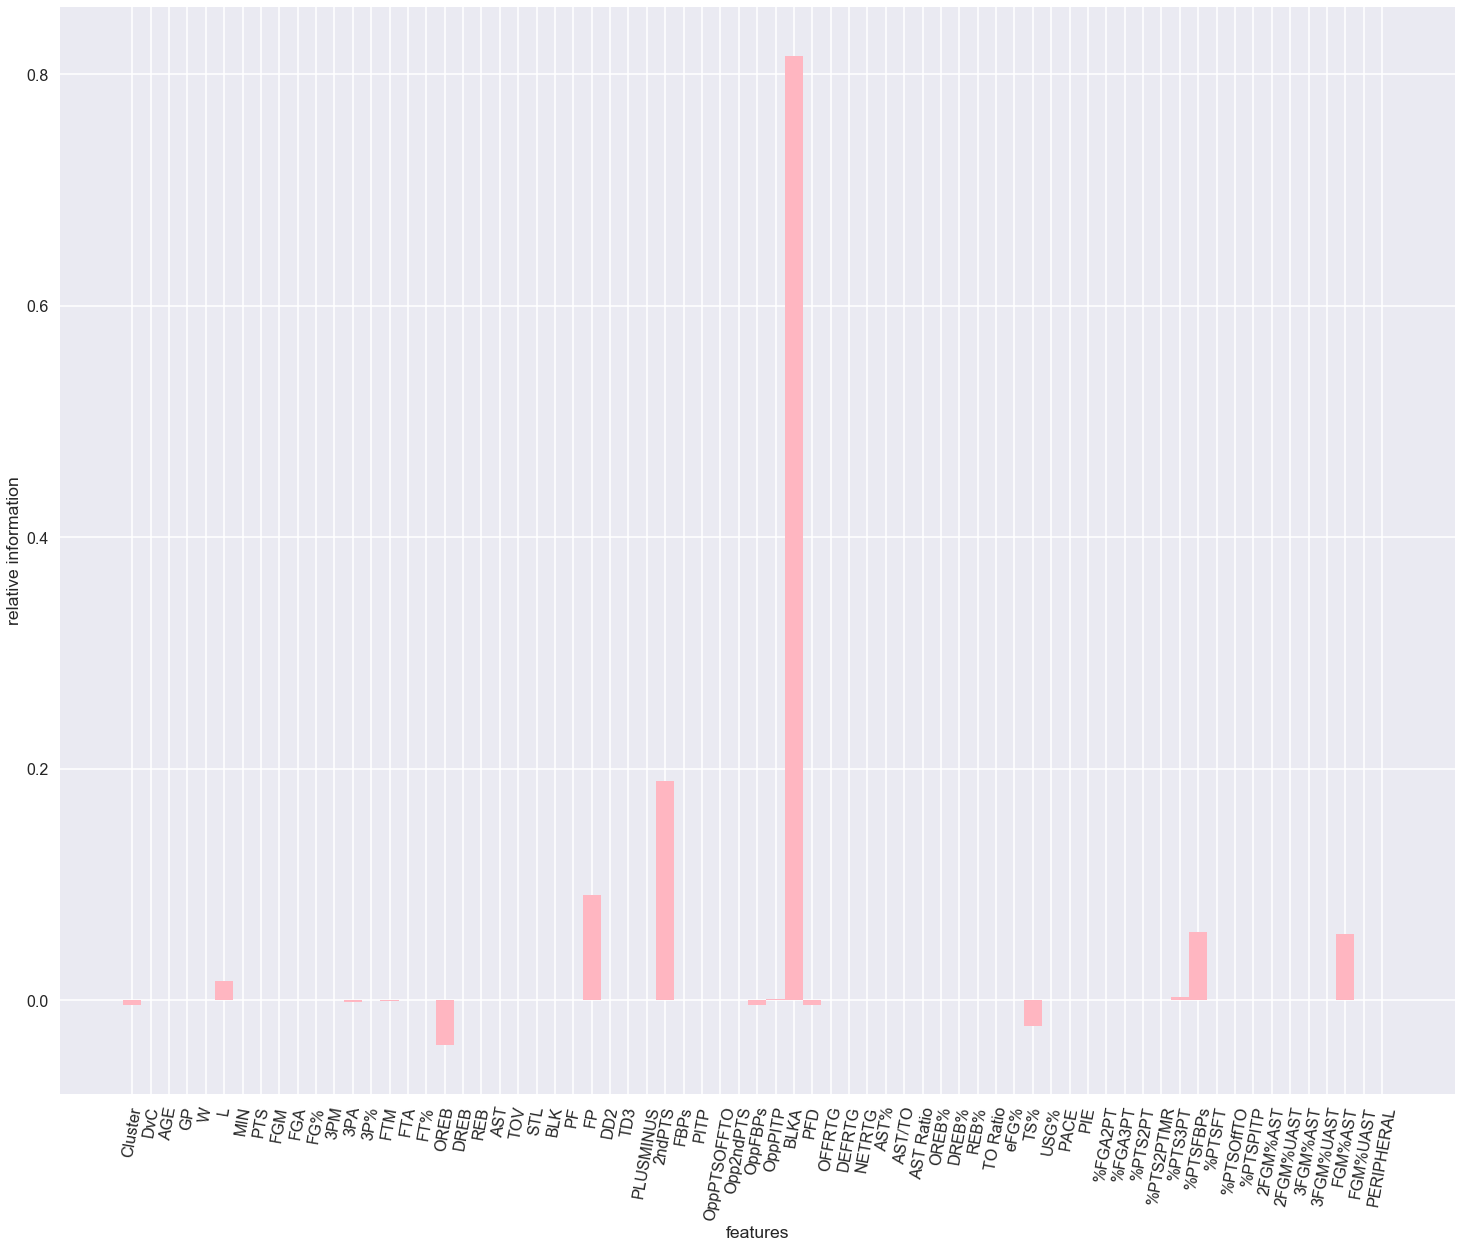

In [257]:
# Plot the Coefficients 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(25,20))
plt.bar(X_cols, coef, width=1, color="lightpink",align='center')
plt.gca().set_xticklabels(range(len(X_cols)), rotation=80 )
plt.xticks(range(len(X_cols)), X_cols.values)
plt.ylabel("relative information")
plt.xlabel("features")
plt.show()

### Elastic Net Analysis

We see that DvC and FP are more important than the others after using our elastic model, we will now utilize other models and techniques to attempt to improve our model and understanding of the importance of our features in predicting FDP

##### Random Forest

Next we will try to use random forest and aim to curtail problems such as overfitting and high variance to improve our feature selection and model's performance

In [266]:
# Import the necessary packages
from sklearn.ensemble import RandomForestRegressor 
%time
# Feature selection with a forest of 10 decision trees 
n_trees = 10
features = mergedf.drop(['FDP', 'Opp', 'PLAYER'], axis=1).columns
rf = RandomForestRegressor(n_trees)
rf.fit(X, y)
plt_x = np.linspace(0, len(features)-1, len(features))
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: float("{0:.2f}".format(round(x, 4))), rf.feature_importances_), features),
             reverse=True))

CPU times: user 12 µs, sys: 3 µs, total: 15 µs
Wall time: 29.1 µs
Features sorted by their score:
[(0.59, 'FP'), (0.25, 'DvC'), (0.0, 'eFG%'), (0.0, 'W'), (0.0, 'USG%'), (0.0, 'TS%'), (0.0, 'TO\xa0Ratio'), (0.0, 'TOV'), (0.0, 'TD3'), (0.0, 'STL'), (0.0, 'REB%'), (0.0, 'REB'), (0.0, 'PTS'), (0.0, 'PLUSMINUS'), (0.0, 'PITP'), (0.0, 'PIE'), (0.0, 'PFD'), (0.0, 'PF'), (0.0, 'PERIPHERAL'), (0.0, 'PACE'), (0.0, 'OppPTSOFFTO'), (0.0, 'OppPITP'), (0.0, 'OppFBPs'), (0.0, 'Opp2ndPTS'), (0.0, 'OREB%'), (0.0, 'OREB'), (0.0, 'OFFRTG'), (0.0, 'NETRTG'), (0.0, 'MIN'), (0.0, 'L'), (0.0, 'GP'), (0.0, 'FTM'), (0.0, 'FTA'), (0.0, 'FT%'), (0.0, 'FGM%UAST'), (0.0, 'FGM%AST'), (0.0, 'FGM'), (0.0, 'FGA'), (0.0, 'FG%'), (0.0, 'FBPs'), (0.0, 'DREB%'), (0.0, 'DREB'), (0.0, 'DEFRTG'), (0.0, 'DD2'), (0.0, 'Cluster'), (0.0, 'BLKA'), (0.0, 'BLK'), (0.0, 'AST\xa0Ratio'), (0.0, 'AST/TO'), (0.0, 'AST%'), (0.0, 'AST'), (0.0, 'AGE'), (0.0, '3PM'), (0.0, '3PA'), (0.0, '3P%'), (0.0, '3FGM%UAST'), (0.0, '3FGM%AST'), (0.0, 

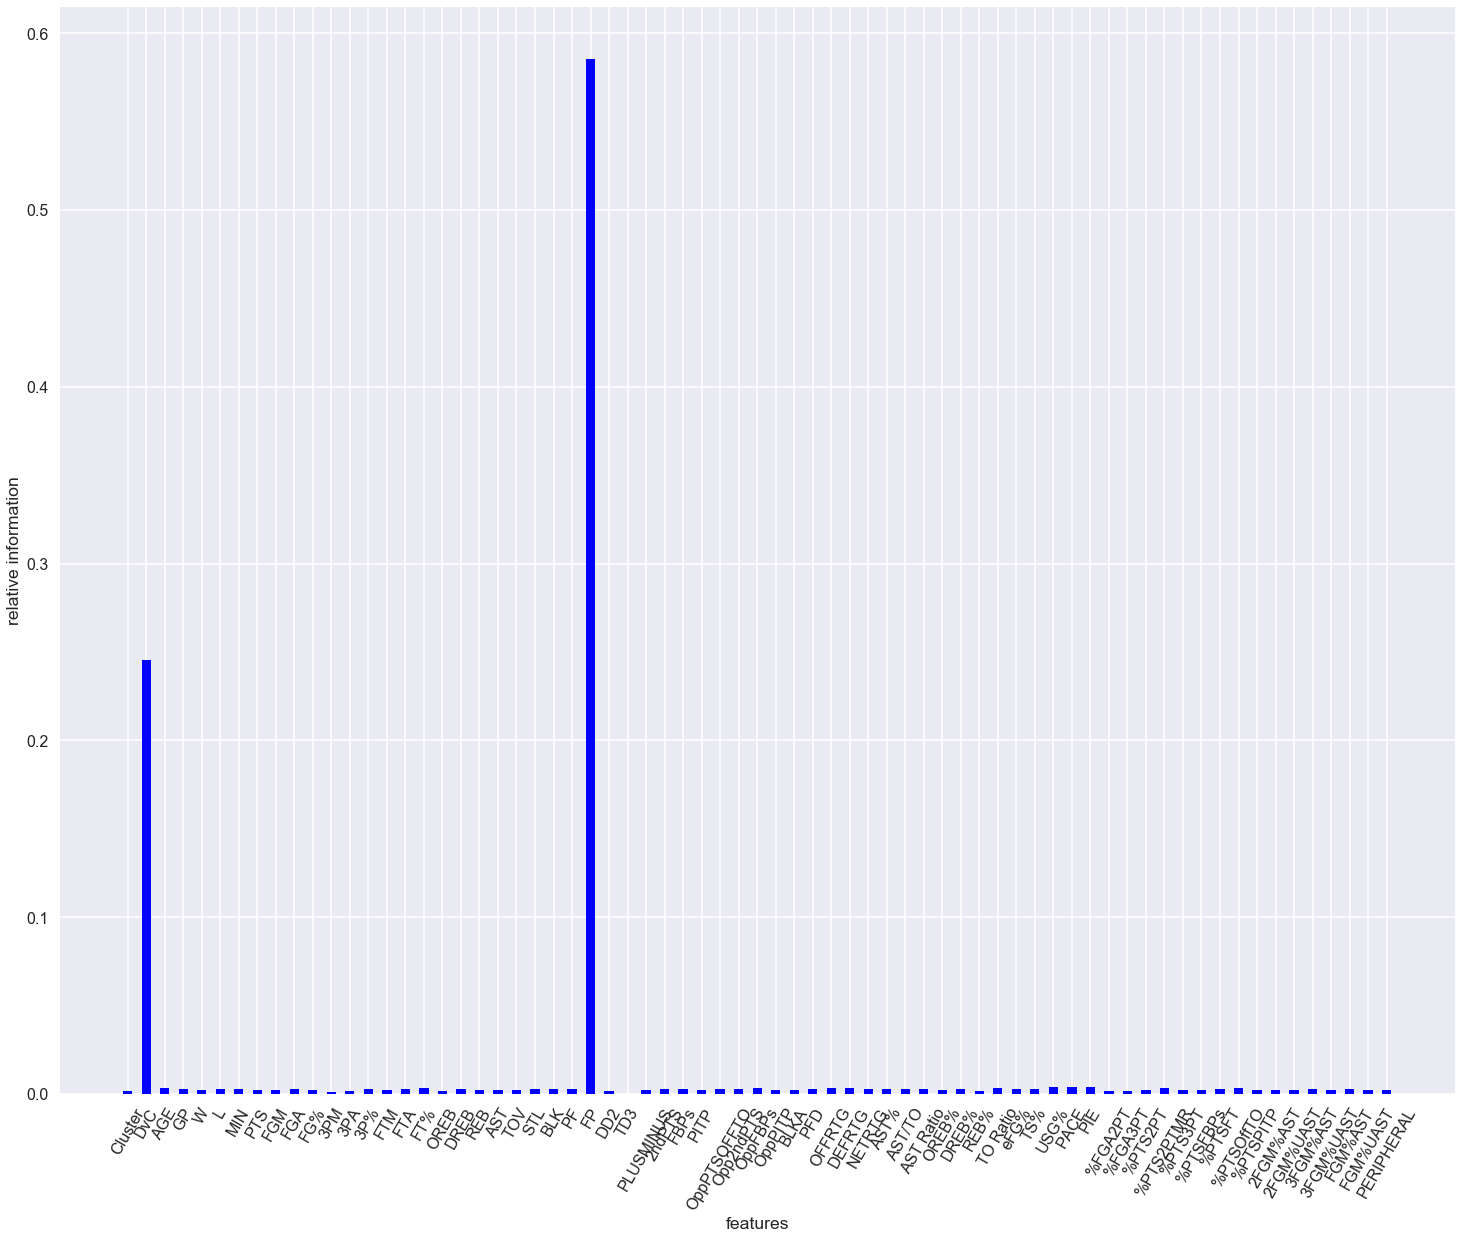

In [268]:
# Plot the feature importance 
plt.figure(figsize=(25,20))
plt.bar(plt_x, rf.feature_importances_, width=0.5, color="blue",align='center')
plt.gca().set_xticklabels(plt_x, rotation=60 )
plt.xticks(plt_x, features)
plt.ylabel("relative information")
plt.xlabel("features")
plt.show()

CPU times: user 9 µs, sys: 2 µs, total: 11 µs
Wall time: 21 µs
Features sorted by their score:
[(0.59, 'FP'), (0.25, 'DvC'), (0.0, 'eFG%'), (0.0, 'W'), (0.0, 'USG%'), (0.0, 'TS%'), (0.0, 'TO\xa0Ratio'), (0.0, 'TOV'), (0.0, 'TD3'), (0.0, 'STL'), (0.0, 'REB%'), (0.0, 'REB'), (0.0, 'PTS'), (0.0, 'PLUSMINUS'), (0.0, 'PITP'), (0.0, 'PIE'), (0.0, 'PFD'), (0.0, 'PF'), (0.0, 'PERIPHERAL'), (0.0, 'PACE'), (0.0, 'OppPTSOFFTO'), (0.0, 'OppPITP'), (0.0, 'OppFBPs'), (0.0, 'Opp2ndPTS'), (0.0, 'OREB%'), (0.0, 'OREB'), (0.0, 'OFFRTG'), (0.0, 'NETRTG'), (0.0, 'MIN'), (0.0, 'L'), (0.0, 'GP'), (0.0, 'FTM'), (0.0, 'FTA'), (0.0, 'FT%'), (0.0, 'FGM%UAST'), (0.0, 'FGM%AST'), (0.0, 'FGM'), (0.0, 'FGA'), (0.0, 'FG%'), (0.0, 'FBPs'), (0.0, 'DREB%'), (0.0, 'DREB'), (0.0, 'DEFRTG'), (0.0, 'DD2'), (0.0, 'Cluster'), (0.0, 'BLKA'), (0.0, 'BLK'), (0.0, 'AST\xa0Ratio'), (0.0, 'AST/TO'), (0.0, 'AST%'), (0.0, 'AST'), (0.0, 'AGE'), (0.0, '3PM'), (0.0, '3PA'), (0.0, '3P%'), (0.0, '3FGM%UAST'), (0.0, '3FGM%AST'), (0.0, '2n

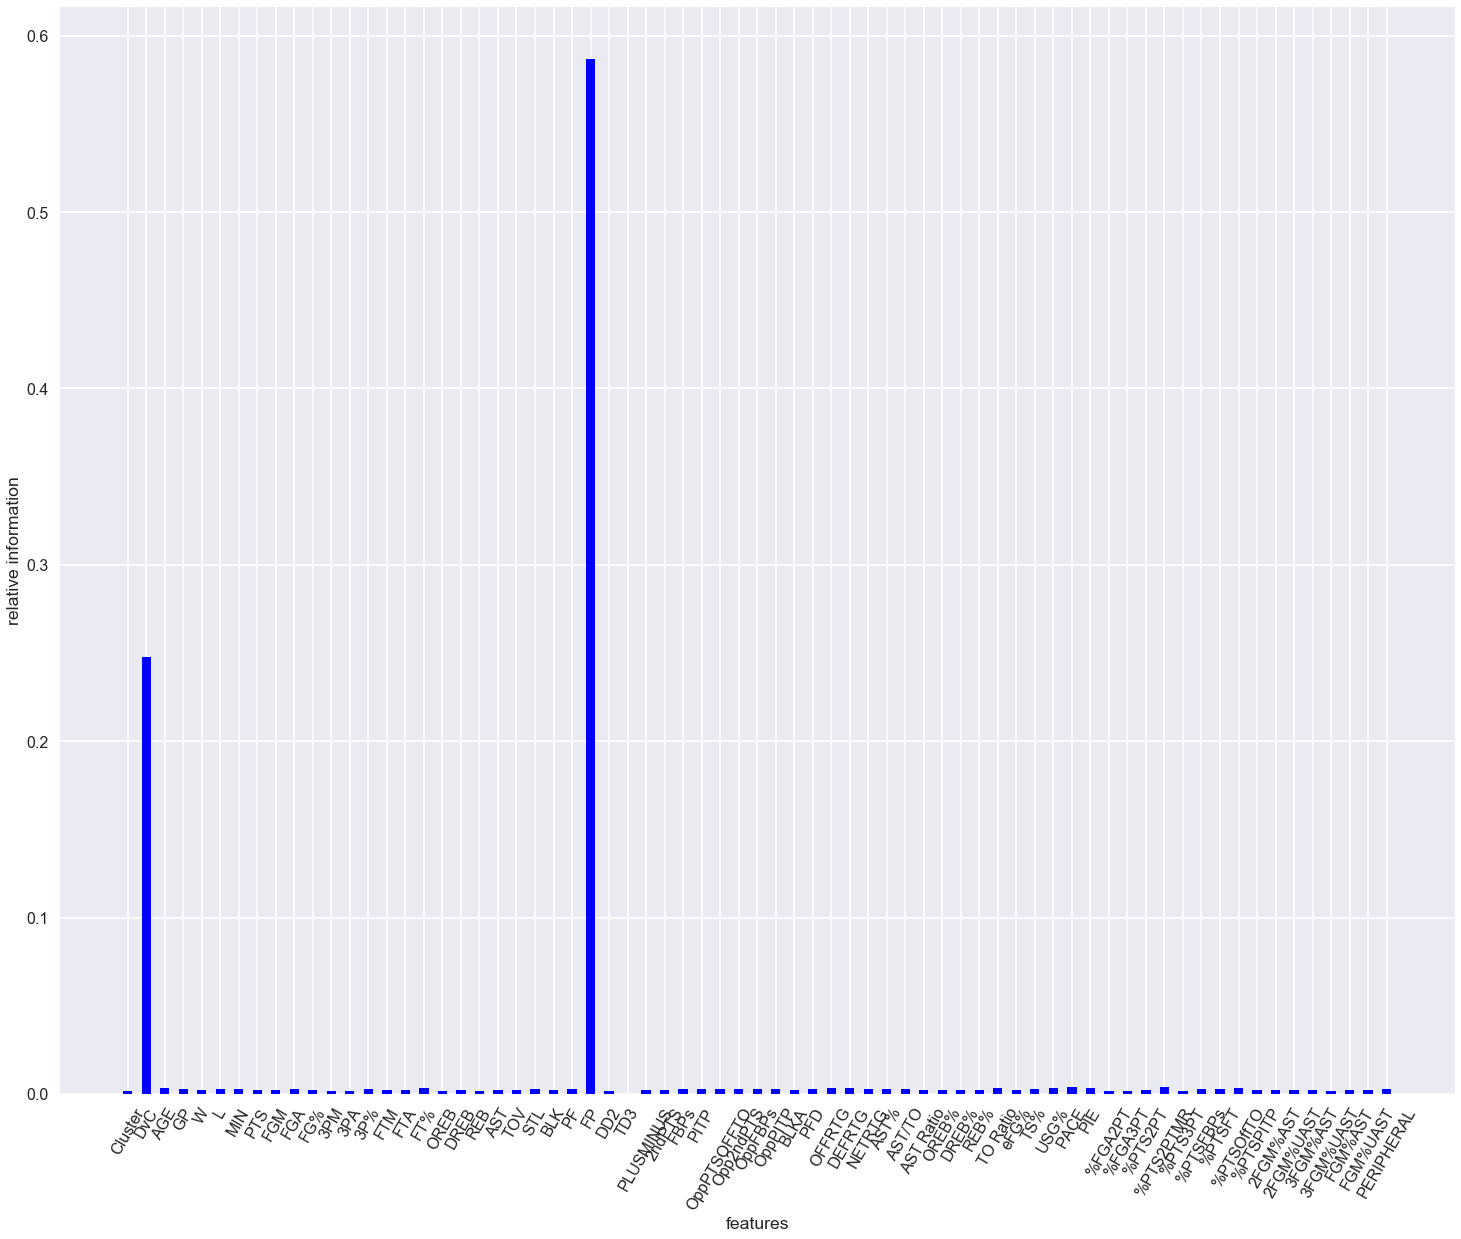

In [269]:
# Feature selection score and plot with a forest of 200 decision trees
%time
n_trees = 200
features = mergedf.drop(['FDP', 'Opp', 'PLAYER'], axis=1).columns
rf = RandomForestRegressor(n_trees)
rf.fit(X, y)
plt_x = np.linspace(0, len(features)-1, len(features))
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: float("{0:.2f}".format(round(x, 4))), rf.feature_importances_), features),
             reverse=True))
plt.figure(figsize=(25,20))

plt.bar(plt_x, rf.feature_importances_, width=0.5, color="blue",align='center')
plt.gca().set_xticklabels(plt_x, rotation=60 )
plt.xticks(plt_x, features)
plt.ylabel("relative information")
plt.xlabel("features")
plt.show()

We see that the most important features when considering all variables are the player's season fantasy points, opponent of the game, and the defense vs cluser ratio

#### eXtreme Gradient Boosting 

We now attempt to use Xgboost to build a stronger predictive model while accounting for computational efficiency, feasibility, and model accuracy using XGBoosting and the insights from all of our previous operations thus far

In [ ]:
# Import necessary packages
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn import cross_validation, metrics 
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV 
from sklearn.metrics import r2_score

In [275]:
finaldf = mergedf
finaldf.head()

,PLAYER,Cluster,Opp,FDP,DvC,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,PLUSMINUS,2ndPTS,FBPs,PITP,OppPTSOFFTO,Opp2ndPTS,OppFBPs,OppPITP,BLKA,PFD,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TO Ratio,eFG%,TS%,USG%,PACE,PIE,%FGA2PT,%FGA3PT,%PTS2PT,%PTS2PTMR,%PTS3PT,%PTSFBPs,%PTSFT,%PTSOffTO,%PTSPITP,2FGM%AST,2FGM%UAST,3FGM%AST,3FGM%UAST,FGM%AST,FGM%UAST,PERIPHERAL
0,Giannis Antetokounmpo,3,chi,52.8,-9.784139,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1
1,Giannis Antetokounmpo,3,bkn,78.1,-12.757394,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1
2,Giannis Antetokounmpo,3,mia,54.0,-12.830732,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1
3,Giannis Antetokounmpo,3,was,63.0,1.462796,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1
4,Giannis Antetokounmpo,3,mia,31.7,-12.830732,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1


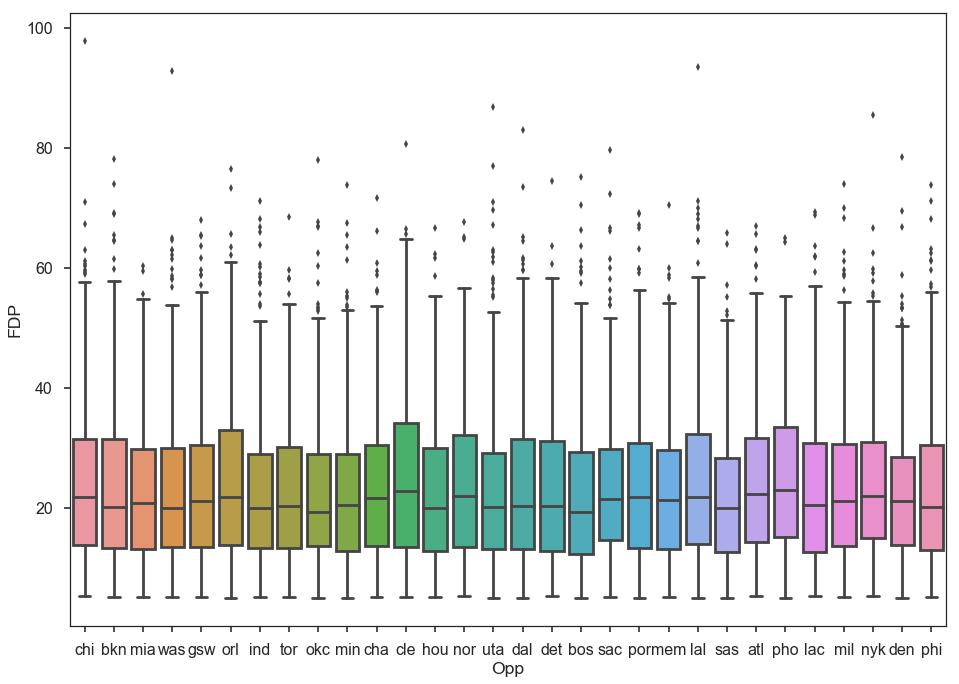

In [283]:
# We notice that the Opp column was dropped before since it was a categorical feature
# In our attempt to improve our model we will plot to show that the opponent does matter
# as we scan see in the boxplot below

fdp = finaldf['FDP']
opp = finaldf['Opp']
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(15.7, 11.27)
sns.boxplot(x=opp, y=fdp)
plt.show()

We can see that several teams this season give up the above-average fantasy points in the boxplot above, these could be the worst-defending team but not necessarily the most losing teams due to many factors such as pace of play e.g. Cavaliers or Warriors

Therefore, since we know Opponents carry explanatory power, we then create a OneHotEncoder for the Opponents column to give the machine learning operation more expressive power to learn a probability-like number for each possible value of fantasy points 

In [284]:
# Get one hot encoding labels for the opponents column 
one_hot = pd.get_dummies(finaldf['Opp'])

# Add our new one hot encoded data to original dataframe for more expressive machine learning
finaldf = finaldf.join(one_hot)

# Verify that the encoding is consistent 
# For instance, row 3 and 5 should have same onehotencoding data with Miami as the opponent
finaldf.head()

,PLAYER,Cluster,Opp,FDP,DvC,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,PLUSMINUS,2ndPTS,FBPs,PITP,OppPTSOFFTO,Opp2ndPTS,OppFBPs,OppPITP,BLKA,PFD,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TO Ratio,eFG%,TS%,USG%,PACE,PIE,%FGA2PT,%FGA3PT,%PTS2PT,%PTS2PTMR,%PTS3PT,%PTSFBPs,%PTSFT,%PTSOffTO,%PTSPITP,2FGM%AST,2FGM%UAST,3FGM%AST,3FGM%UAST,FGM%AST,FGM%UAST,PERIPHERAL,atl,bkn,bos,cha,chi,cle,dal,den,det,gsw,hou,ind,lac,lal,mem,mia,mil,min,nor,nyk,okc,orl,phi,pho,por,sac,sas,tor,uta,was
0,Giannis Antetokounmpo,3,chi,52.8,-9.784139,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Giannis Antetokounmpo,3,bkn,78.1,-12.757394,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Giannis Antetokounmpo,3,mia,54.0,-12.830732,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Giannis Antetokounmpo,3,was,63.0,1.462796,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Giannis Antetokounmpo,3,mia,31.7,-12.830732,23,30,16,14,37.9,29.5,10.8,19.8,54.5,0.5,1.8,27.3,7.4,9.6,77.7,2.1,8.2,10.3,4.6,2.8,1.8,1.4,3.3,55.6,15,0,3.3,3.2,5.1,17.9,10.7,9.6,4.9,33.0,0.7,7.3,110.0,105.0,5.0,22.3,1.64,14.6,6.7,25.0,15.9,8.9,55.7,61.4,32.2,98.21,20.2,90.8,9.2,69.8,9.3,5.1,17.4,25.2,17.2,60.5,43.4,56.6,93.3,6.7,45.7,54.3,26.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [287]:
#Scale data and perform Xgboost

# Turn our columns into our features array 
X2 = finaldf.drop(['FDP', 'PLAYER', 'Opp'], axis=1).values

# Turn FDP column into our Fanduel Fantasy Points target array 
y2 = finaldf['FDP'].values

# Scalin data using standard scaler method
# that removes the means and scales our features data to unit variance 
from sklearn import preprocessing
Xscale = preprocessing.StandardScaler().fit_transform(X2)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(Xscale, y2, test_size= 0.25, random_state= 42)

# A parameter grid for XGBoost
params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}

# Initialize XGB and GridSearch
xgb = XGBRegressor(nthread=8) 
grid = RandomizedSearchCV(xgb, params)
grid.fit(X_train, y_train)

# Print the r2 score
print(r2_score(y_test, grid.best_estimator_.predict(X_test)))

0.5304374442727098


In [288]:
y_pred = grid.predict(X_test)
r2 = grid.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Square Error with Standard Scaler: ', mse)
print('R-Square with Standard Scaler: ', r2)

Mean Square Error with Standard Scaler:  78.06814929775163
R-Square with Standard Scaler:  0.5304374442727098


Please Note: We observed that the different scaling methods yield similar performance of our model (see code in Part 2 notebook)

Unscaled <br>
Mean Square Error:  78.0125515160631 <br>
R-Square:  0.5274040697672309 <br>

Mean Square Error with Standard Scaler:  78.45360206489102 <br>
R-Square with Standard Scaler:  0.5247322087608634 <br>

Mean Square Error with MinMaxScaler:  78.29224403701797<br>
R-Square with MinMaxScaler:  0.5257097071992716<br>

Mean Square Error with MaxAbsScaler:  78.4817558902674<br>
R-Square with MaxAbsScaler:  0.5245616543688484<br>

Mean Square Error with RobustScaler:  78.50555589540772<br>
R-Square with RobustScaler:  0.5244174751906232<br>

Mean Square Error with QuantileTransformer:  78.57735919629974<br>
R-Square with QuantileTransformer:  0.5239824945737943<br>

### Conclusion

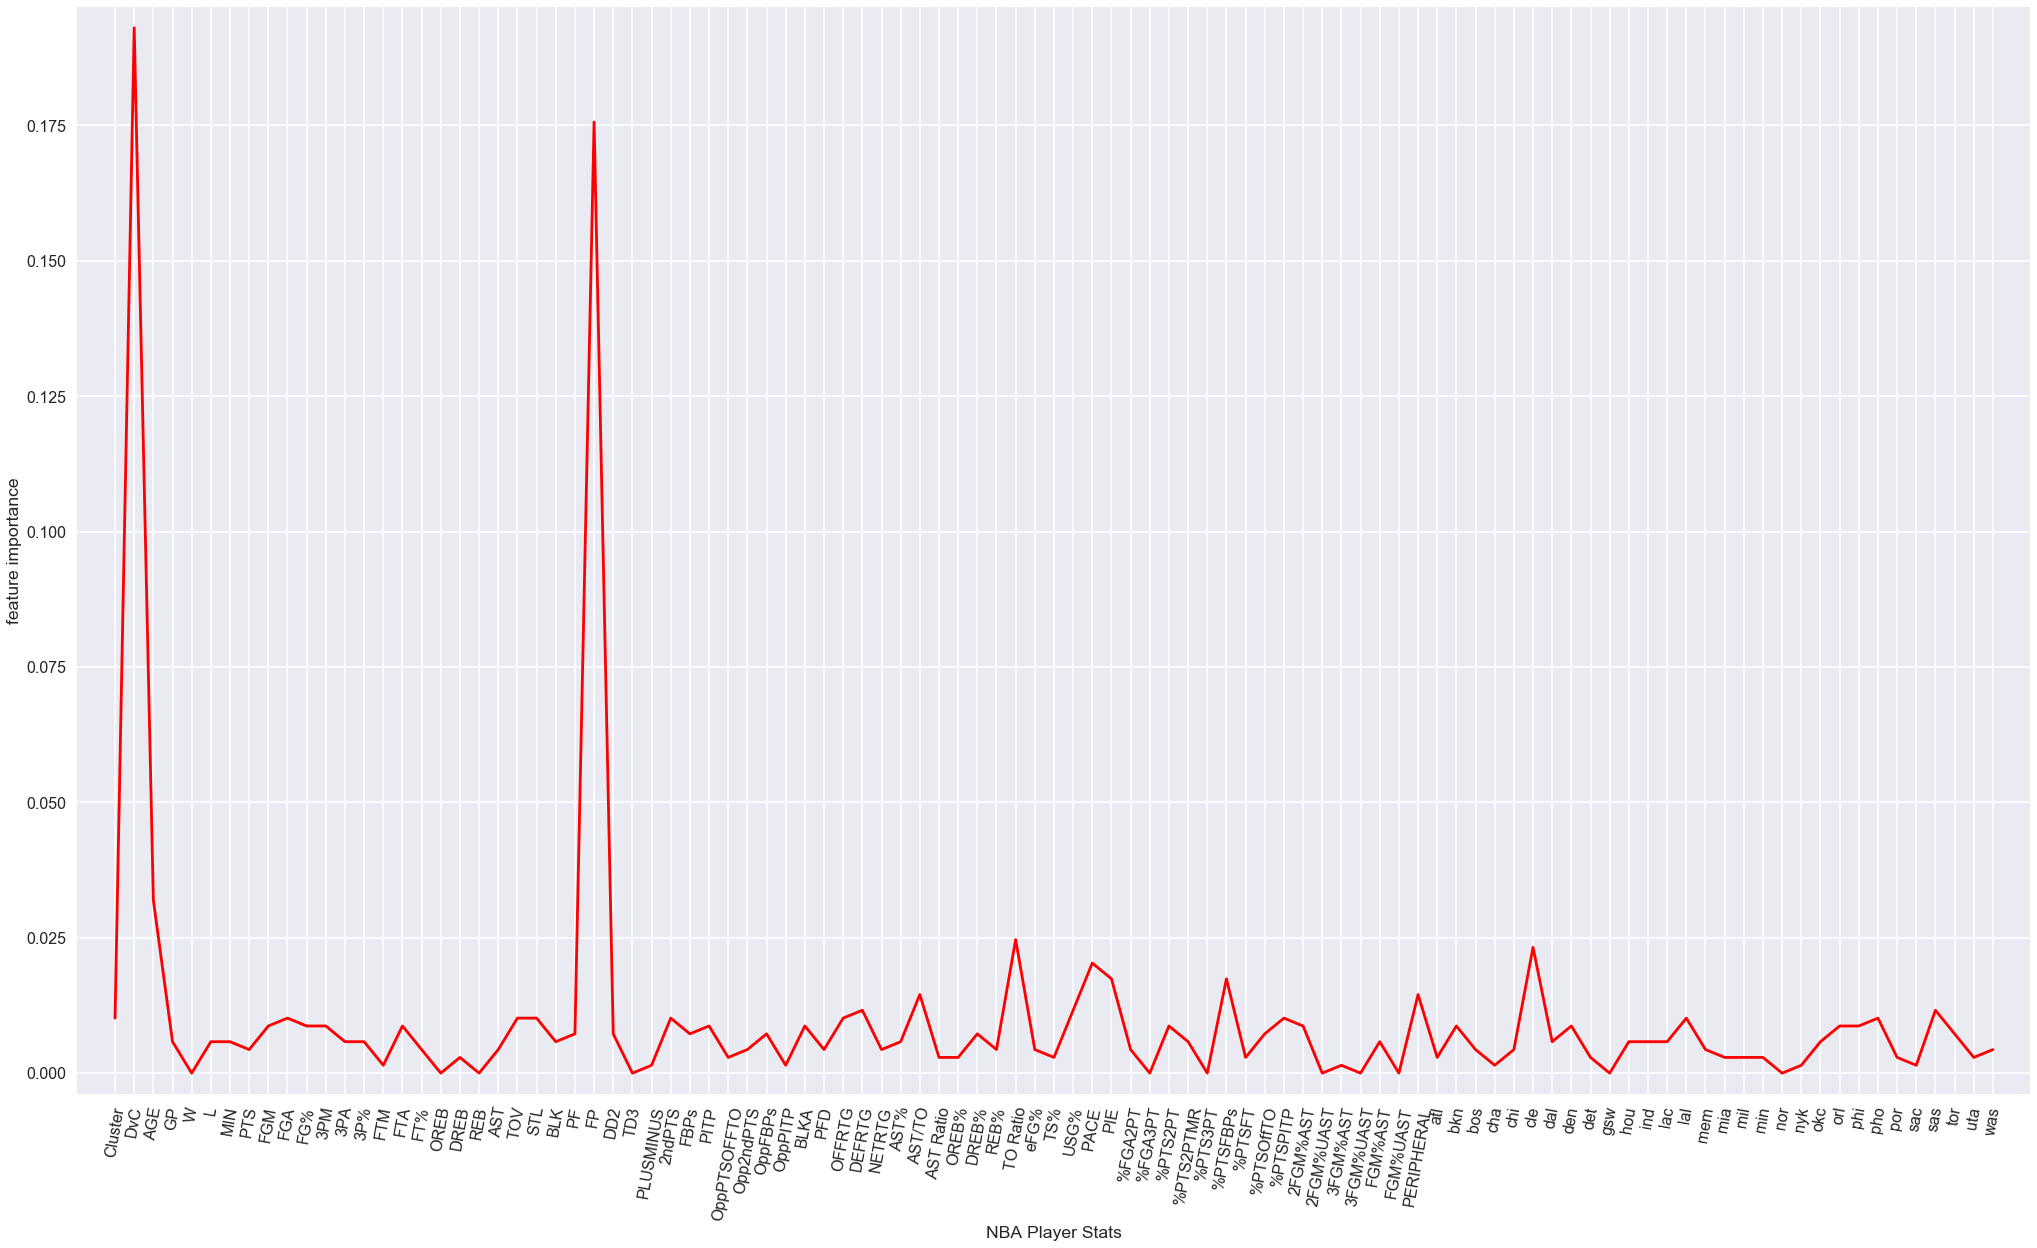

In [293]:
# We now put everything together to compute our model's coefficients
# using the importance of each feature which will help us with calculating
# a projection of fantasy points for each player using his stats
xgb_coef = xgb.fit(X2, y2).feature_importances_
xgb_cols = finaldf.drop(['FDP', 'PLAYER', 'Opp'], axis=1).columns

# Visualization of the XGB feature importances
sns.set_style("darkgrid")
plt.figure(figsize=(35,20))
plt.plot(range(len(xgb_cols)), xgb_coef, color='red')
plt.xticks(range(len(xgb_cols)), xgb_cols.values, rotation=80)
plt.margins(0.02)
plt.ylabel("feature importance")
plt.xlabel("NBA Player Stats")
plt.show()

In [295]:
# Create a DataFrame that shows the importance of each feature
capstone_df = pd.DataFrame(index=xgb_cols)
capstone_df['Feature_Importance'] = xgb_coef
capstone_df['Fea_Imp_2'] = capstone_df['Feature_Importance'] * 100

# Sort DataFrame in order of importance
capstone_df.sort_values('Feature_Importance', ascending=False)

,Feature_Importance,Fea_Imp_2
DvC,0.193033,19.303339
FP,0.175617,17.561684
AGE,0.031930,3.193033
TO Ratio,0.024673,2.467344
cle,0.023222,2.322206
PACE,0.020319,2.031930
PIE,0.017417,1.741655
%PTSFBPs,0.017417,1.741655
PERIPHERAL,0.014514,1.451379
AST/TO,0.014514,1.451379


We confirm our initial hypothesis that Defense versus Clustering, DvC, is indeed a very important predictor of Fanduel Fantasy Points with seasonal FP right behind it.

We notice that other features are ranked as expected such as pace and player impact estimate and age. A slower team will score more FP if they are playing a faster team who dictates the pace. Younger and more-impact players will score more FP. 

We do notice some surprising and intriguing results such as certain opponents greatly impact FP such as Cleveland and San Antonio. One possible interpretation is that these teams draw more attention and likely is televised nationally which could incentivize players to hustle more on the court. Additionally, after DvC and FP, the rest of the features are very close with each other and that the coefficients for some stats that are generally regarded as very important and predictive of future player performance in the basketball analytics community are actually not very predictive of daily fantasy performance such as minutes, effective field goal percentage, true shooting percentage, etc. This phenommenon could be due to these stats don't change on a daily basis often enough that the changes are accounted for in Fanduel's daily pricing algorithm.